Import Libraries

In [3]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 KB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 25.

In [4]:
pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 KB 4.2 MB/s eta 0:00:00


In [5]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')
from imblearn.pipeline import Pipeline
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report, roc_curve, roc_auc_score , recall_score , precision_score, f1_score
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score,                                     train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [7]:
raw_data = pd.read_csv('/content/forestfires.csv')
forest_fire = pd.read_csv('/content/forestfire.csv')
raw_data['size_category'] = forest_fire.size_category
raw_data

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

    size_category  
0           small  
1           small  
2           small  
3           small  
4           small  
..            ...  
512         large  
513         large  
514         large  
515         small  
516         small  

[517 rows x 14 columns]

Data Exploration

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X              517 non-null    int64  
 1   Y              517 non-null    int64  
 2   month          517 non-null    object 
 3   day            517 non-null    object 
 4   FFMC           517 non-null    float64
 5   DMC            517 non-null    float64
 6   DC             517 non-null    float64
 7   ISI            517 non-null    float64
 8   temp           517 non-null    float64
 9   RH             517 non-null    int64  
 10  wind           517 non-null    float64
 11  rain           517 non-null    float64
 12  area           517 non-null    float64
 13  size_category  517 non-null    object 
dtypes: float64(8), int64(3), object(3)
memory usage: 56.7+ KB


In [9]:
raw_data.isnull().sum()

X                0
Y                0
month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [10]:
raw_data[raw_data.duplicated()]

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
53   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00   
100  3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00   
215  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66   
303  3  6   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00   

    size_category  
53          small  
100         small  
215         large  
303         small

In [11]:
# List of Numerical Variables
numerical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
raw_data[numerical_features].head()

Number of numerical variables: 11


X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

In [16]:
discrete_feature=[feature for feature in numerical_features if len(raw_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 4


In [17]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [18]:
# find categorical variables

categorical = [var for var in raw_data.columns if raw_data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


In [19]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(raw_data[var].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
small    378
large    139
Name: size_category, dtype: int64


In [20]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(raw_data[var].value_counts()/np.float(len(raw_data)))

aug    0.355899
sep    0.332689
mar    0.104449
jul    0.061896
feb    0.038685
jun    0.032882
oct    0.029014
apr    0.017408
dec    0.017408
jan    0.003868
may    0.003868
nov    0.001934
Name: month, dtype: float64
sun    0.183752
fri    0.164410
sat    0.162476
mon    0.143133
tue    0.123791
thu    0.117988
wed    0.104449
Name: day, dtype: float64
small    0.731141
large    0.268859
Name: size_category, dtype: float64


In [21]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(raw_data[var].unique()), ' labels')

month  contains  12  labels
day  contains  7  labels
size_category  contains  2  labels


We can see that none the column contains relatively large number of labels.

In [22]:
raw_data.corr()

X         Y      FFMC       DMC        DC       ISI      temp  \
X     1.000000  0.539548 -0.021039 -0.048384 -0.085916  0.006210 -0.051258   
Y     0.539548  1.000000 -0.046308  0.007782 -0.101178 -0.024488 -0.024103   
FFMC -0.021039 -0.046308  1.000000  0.382619  0.330512  0.531805  0.431532   
DMC  -0.048384  0.007782  0.382619  1.000000  0.682192  0.305128  0.469594   
DC   -0.085916 -0.101178  0.330512  0.682192  1.000000  0.229154  0.496208   
ISI   0.006210 -0.024488  0.531805  0.305128  0.229154  1.000000  0.394287   
temp -0.051258 -0.024103  0.431532  0.469594  0.496208  0.394287  1.000000   
RH    0.085223  0.062221 -0.300995  0.073795 -0.039192 -0.132517 -0.527390   
wind  0.018798 -0.020341 -0.028485 -0.105342 -0.203466  0.106826 -0.227116   
rain  0.065387  0.033234  0.056702  0.074790  0.035861  0.067668  0.069491   
area  0.063385  0.044873  0.040122  0.072994  0.049383  0.008258  0.097844   

            RH      wind      rain      area  
X     0.085223  0.018798  0.065387  0.063385  
Y     0.062221 -0.020341  0.033234  0.044873  
FFMC -0.300995 -0.028485  0.056702  0.040122  
DMC   0.073795 -0.105342  0.074790  0.072994  
DC   -0.039192 -0.203466  0.035861  0.049383  
ISI  -0.132517  0.106826  0.067668  0.008258  
temp -0.527390 -0.227116  0.069491  0.097844  
RH    1.000000  0.069410  0.099751 -0.075519  
wind  0.069410  1.000000  0.061119  0.012317  
rain  0.099751  0.061119  1.000000 -0.007366  
area -0.075519  0.012317 -0.007366  1.000000

Data Visualization

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'X'),
  Text(1.5, 0, 'Y'),
  Text(2.5, 0, 'FFMC'),
  Text(3.5, 0, 'DMC'),
  Text(4.5, 0, 'DC'),
  Text(5.5, 0, 'ISI'),
  Text(6.5, 0, 'temp'),
  Text(7.5, 0, 'RH'),
  Text(8.5, 0, 'wind'),
  Text(9.5, 0, 'rain'),
  Text(10.5, 0, 'area')])

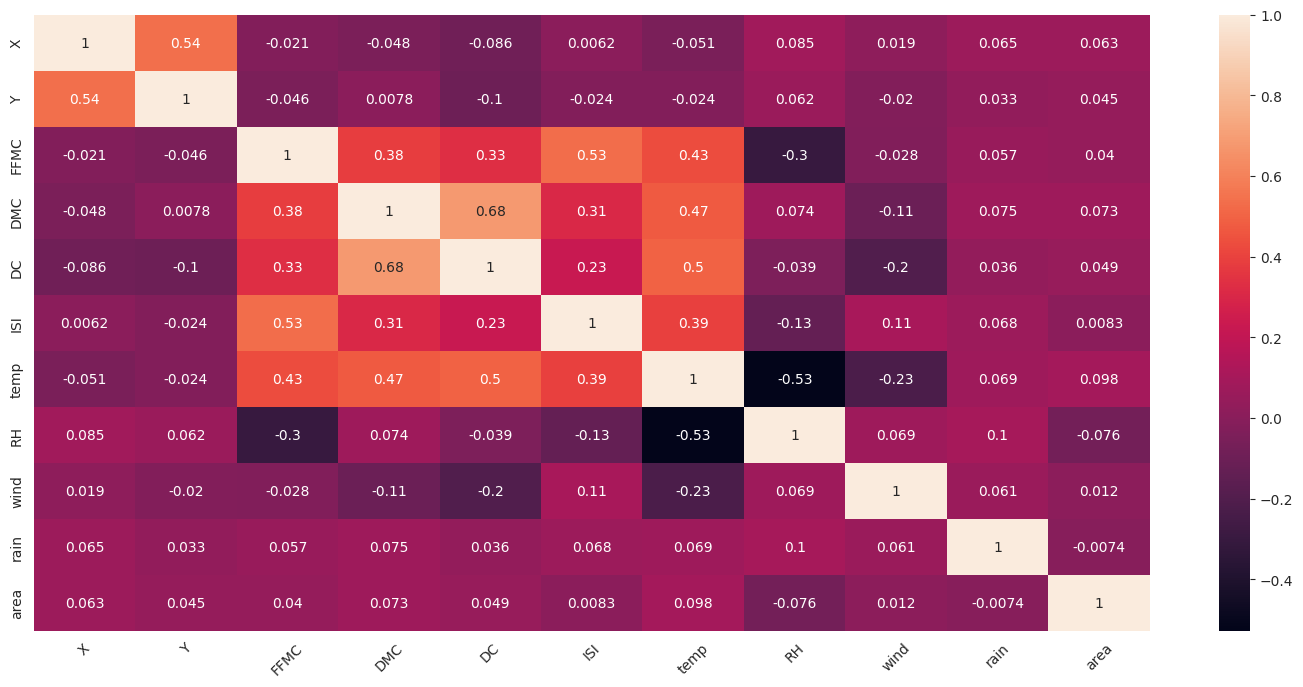

In [12]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(raw_data.corr(), annot=True);
plt.xticks(rotation=45)

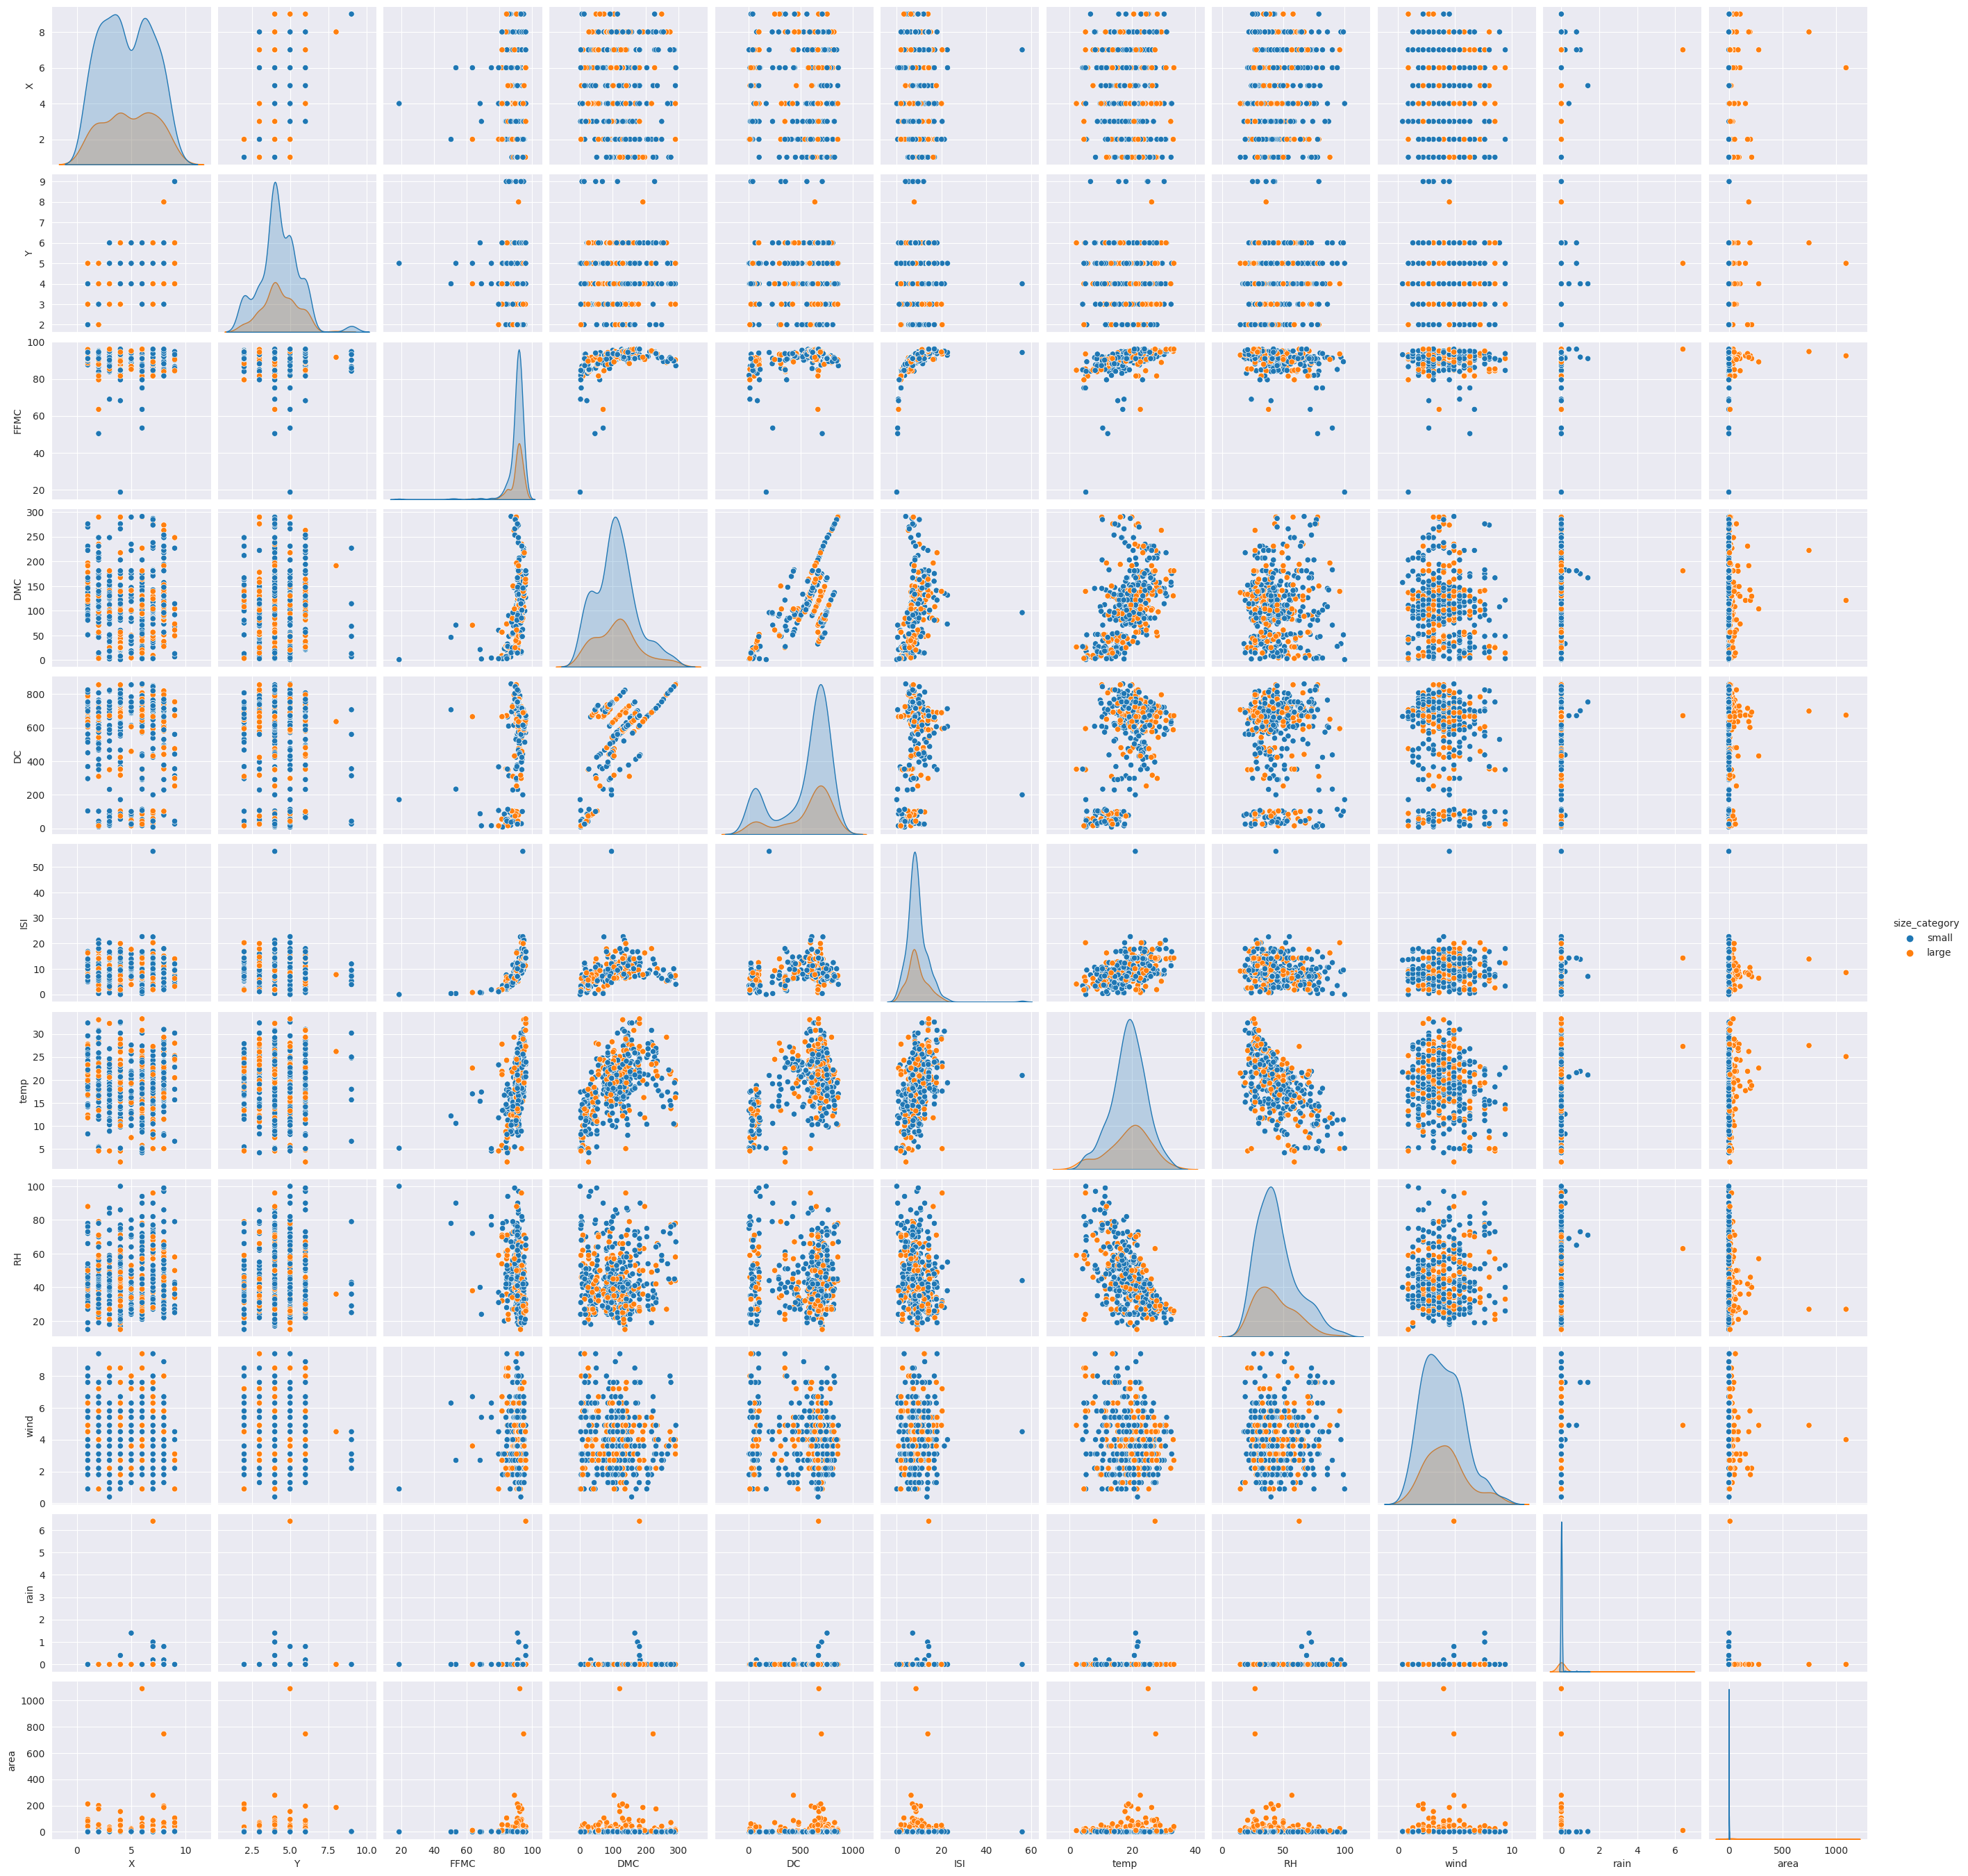

In [13]:
sns.set_style('darkgrid')
sns.pairplot(raw_data, hue='size_category')
plt.show()

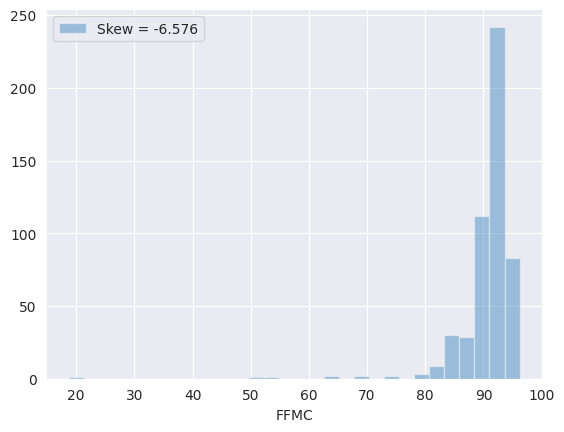

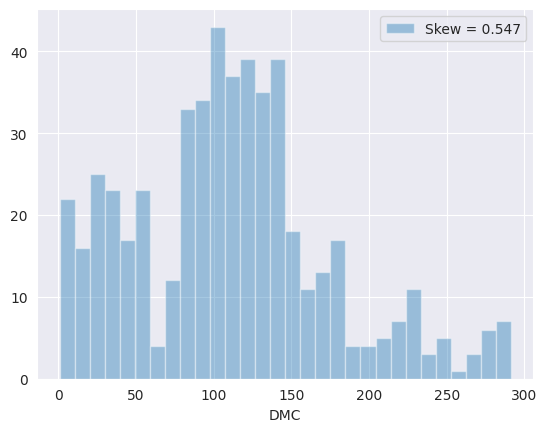

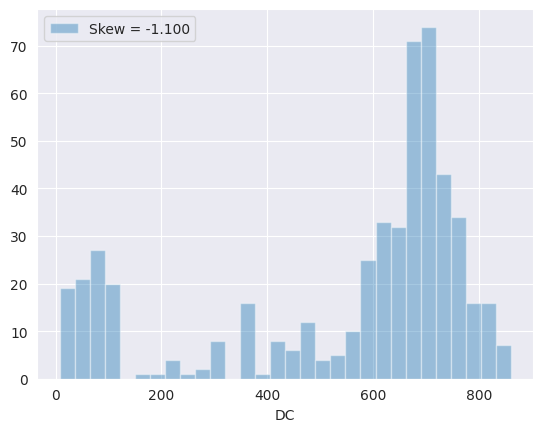

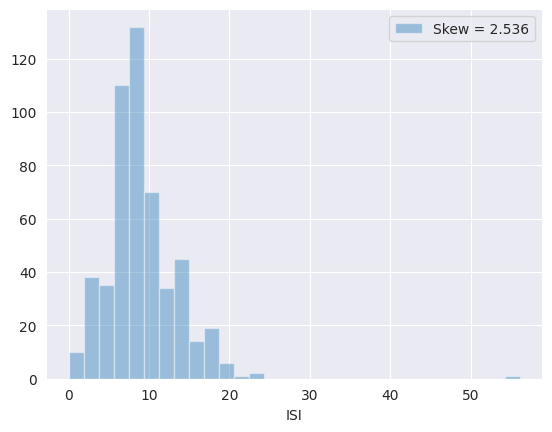

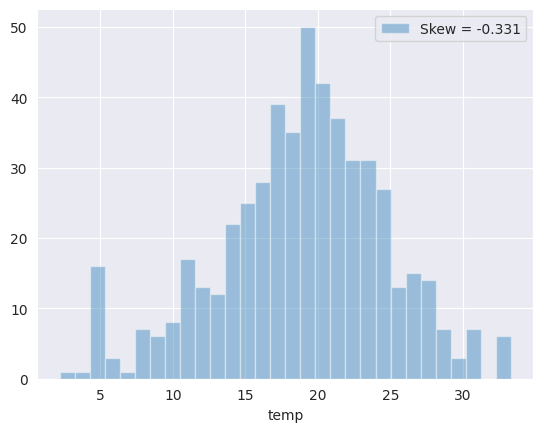

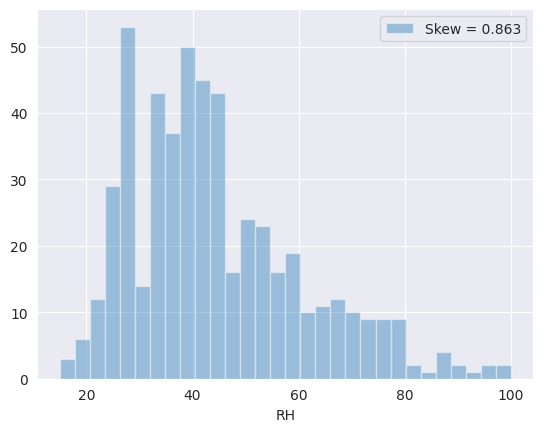

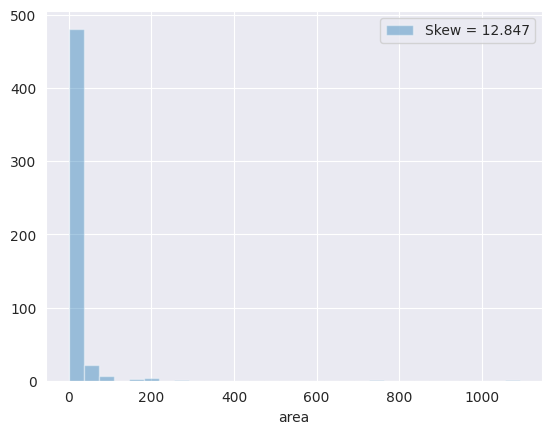

In [30]:
for feat in continuous_feature:
    skew = raw_data[feat].skew()
    sns.distplot(raw_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

Outliers Detection

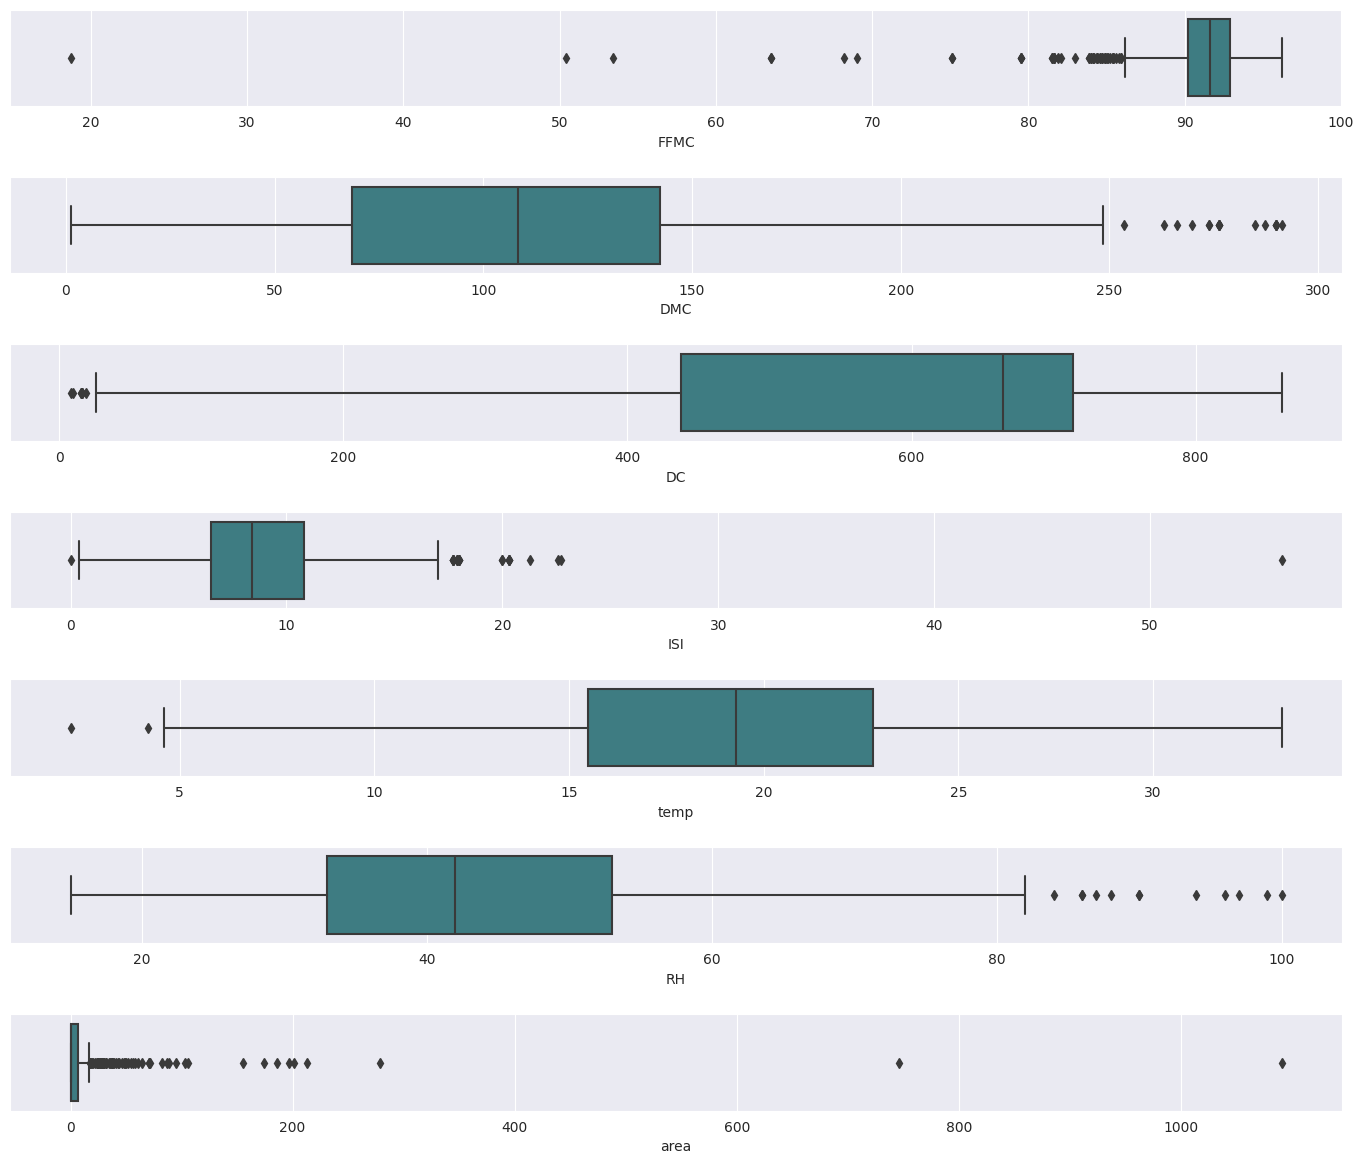

In [14]:
ot=raw_data.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

After Log-Transformation

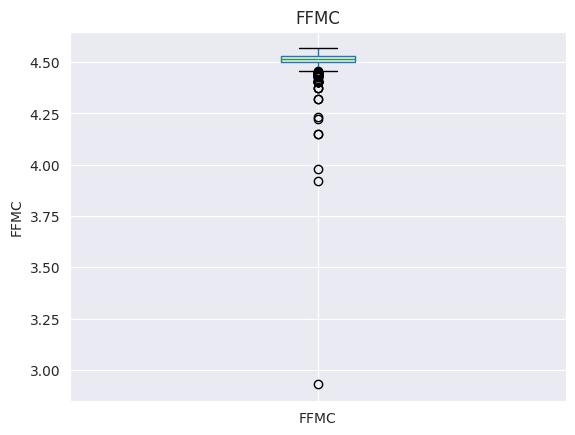

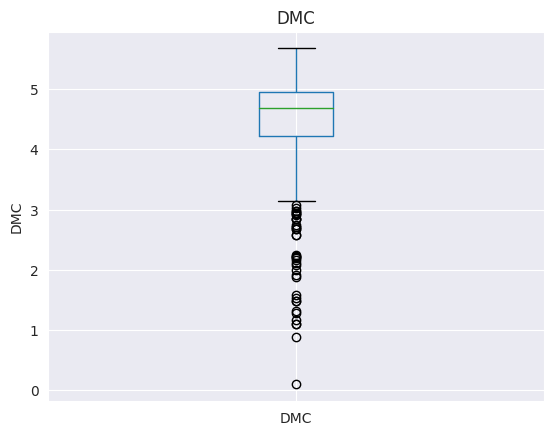

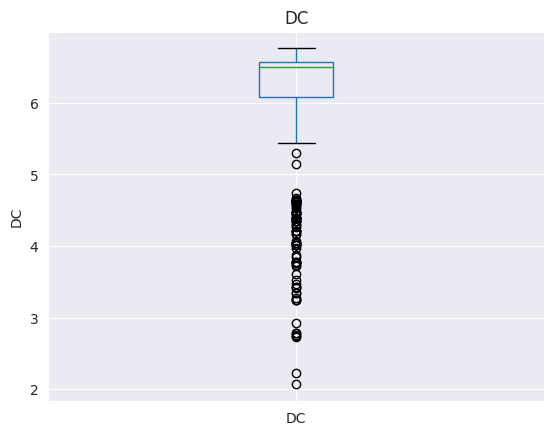

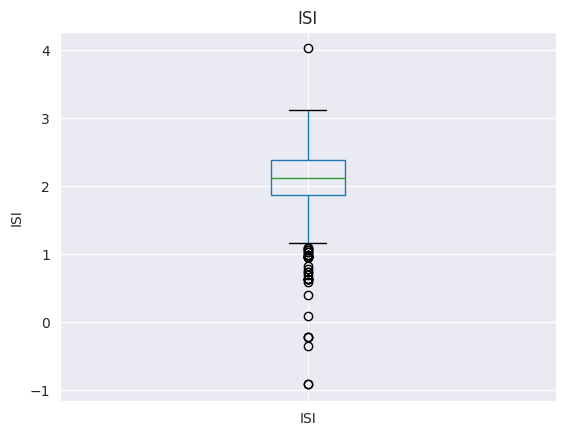

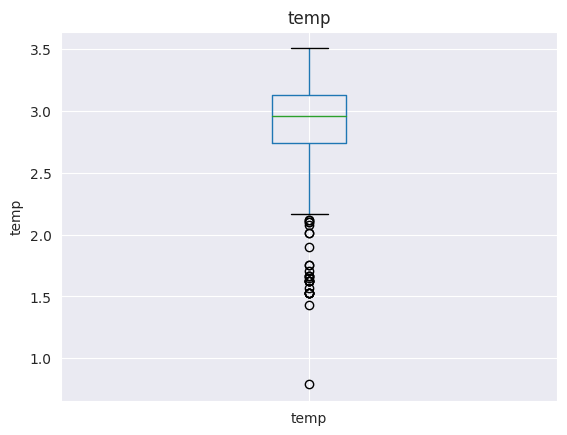

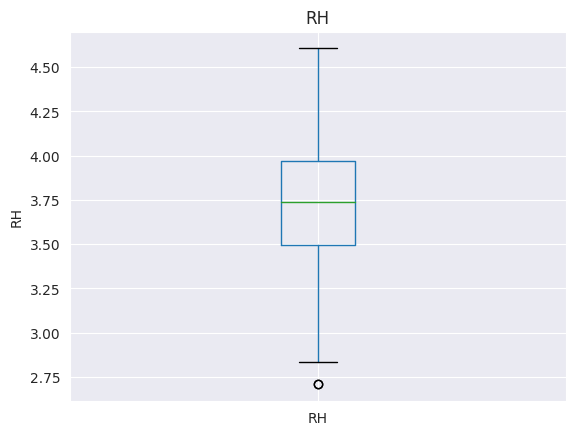

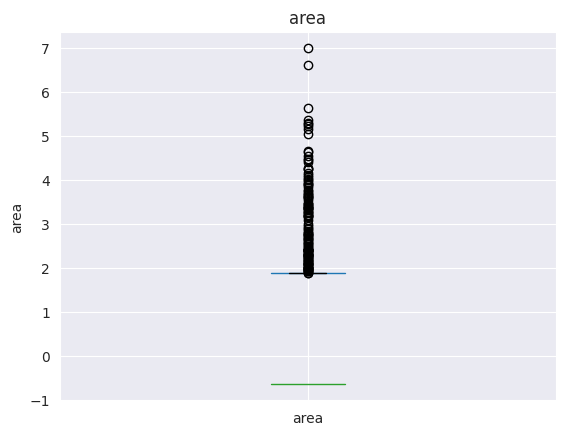

In [23]:
for feature in continuous_feature:
    data=raw_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Visualize the distribution of 'Area' and taking insights

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


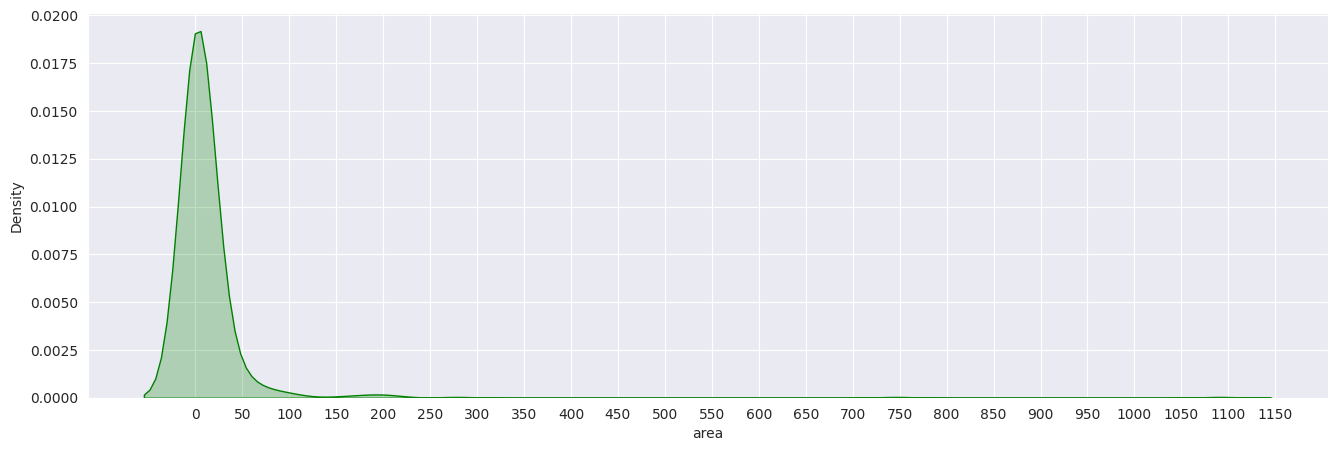

In [24]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(raw_data['area'].skew()))
print("Kurtosis: {}".format(raw_data['area'].kurtosis()))
ax = sns.kdeplot(raw_data['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

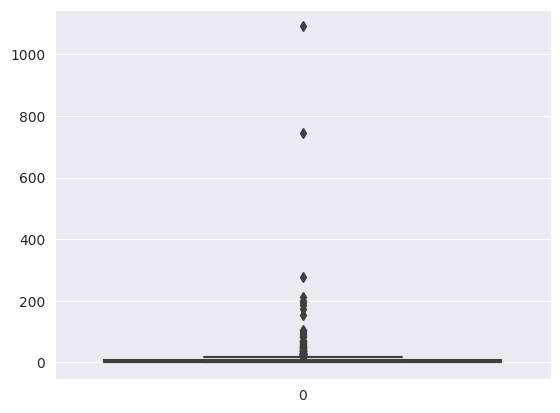

In [25]:
ax = sns.boxplot(raw_data['area'])

**Few observations:**
* The data is highly skewed with a value of +12.84 and huge kurtosis value of 194.

* It even tells you that majority of the forest fires do not cover a large area, most of the damaged area is under 50 hectares of land.

* We can apply tranformation to fix the skewnesss and kurtosis, however we will have to inverse transform before submitting the output.

* Outlier Check: There are 4 outlier instances in our area columns but the questions is should we drop it or not? (Will get back to this in the outlier treatment step)

In [26]:
categorical_features=[feature for feature in raw_data.columns if raw_data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
raw_data[categorical_features].head()

Number of Categorical Features: 3 
 ['month', 'day', 'size_category']


month  day size_category
0   mar  fri         small
1   oct  tue         small
2   oct  sat         small
3   mar  fri         small
4   mar  sun         small

In [27]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(raw_data[feature].unique()),feature))

12 number of unique categories in feature named month
7 number of unique categories in feature named day
2 number of unique categories in feature named size_category


In [28]:
# Decide which categorical variables you want to use in model
for feature in raw_data.columns:
    if raw_data[feature].dtypes == 'object':# in pandas it is object
        unique_cat = len(raw_data[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(raw_data[feature].value_counts())
        print()

Feature 'month' has 12 unique categories
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

Feature 'day' has 7 unique categories
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

Feature 'size_category' has 2 unique categories
small    378
large    139
Name: size_category, dtype: int64



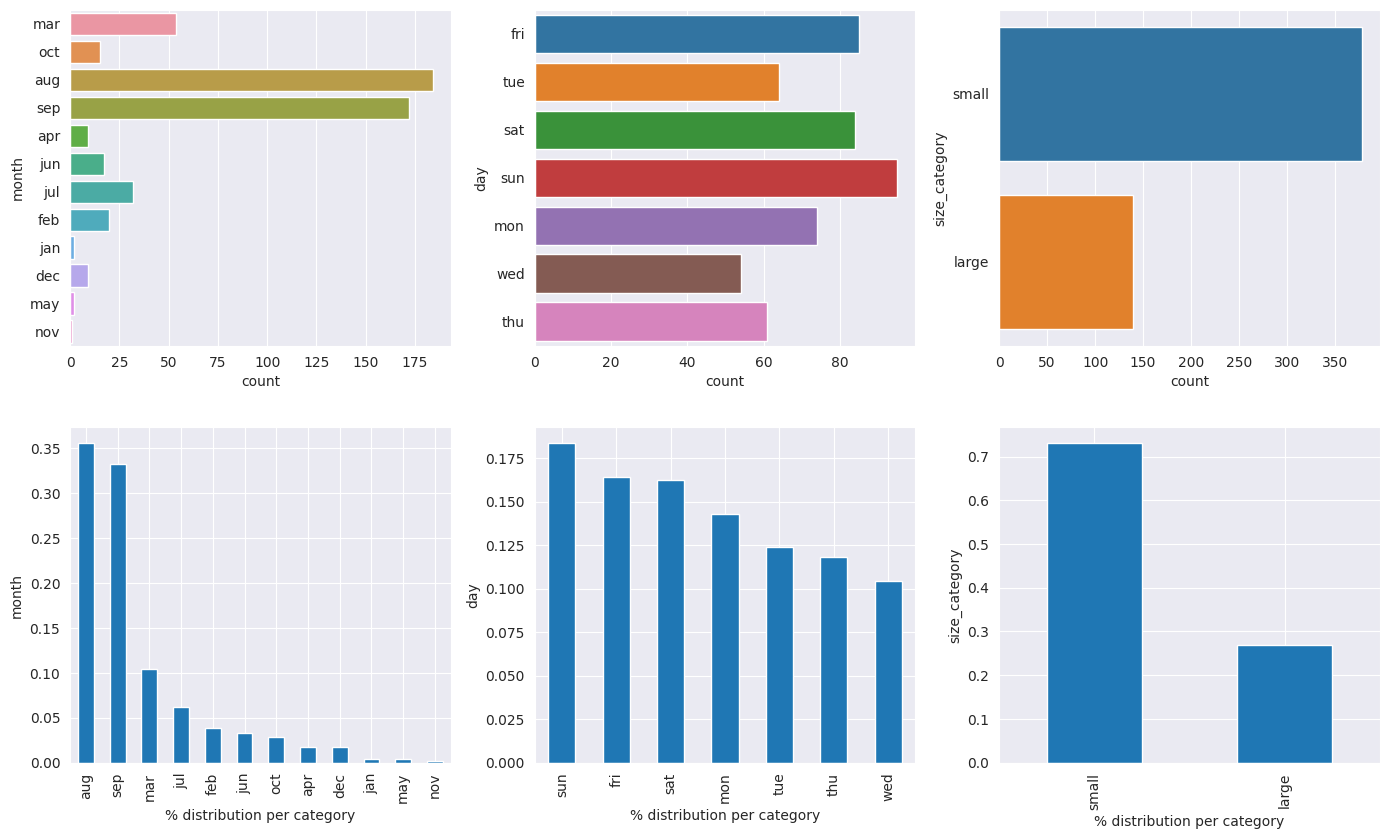

In [32]:
# analyzing categorical columns
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data=raw_data,y=col)
    plt.subplot(3,3,i+3)
    raw_data[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

1. It is interesting to see that abnormally high number of the forest fires occur in the month of August and September.

2. In the case of day, the days from Friday to Monday have higher equal proportion of cases. (However, no strong indicators)May be because of the weekend animal throw some kind of cool party and

**Analyzing the relationship of categorical features with respect to the Target feature**

In [33]:
print(raw_data['area'].describe(),'\n')
# A categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high
df=raw_data.copy()
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 



X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

  size_category damage_category  
0         small       No damage  
1         small       No damage  
2         small       No damage  
3         small       No damage  
4         small       No damage

In [34]:
print(raw_data['area'].describe(),'\n')
# A categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high
df=raw_data.copy()
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 



X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

  size_category damage_category  
0         small       No damage  
1         small       No damage  
2         small       No damage  
3         small       No damage  
4         small       No damage

* Previously we had observed that August and September had the most number of forest fires. And from the above plot of month, we can understand few things

* Most of the fires in August were low (< 1 hectare).

* The very high damages(>100 hectares) happened in only 3 months - august,jan and september.

* Regarding fire damage per day, nothing much can be observed. Except that, there were no very high damaging fires on Friday and on Saturdays it has been reported most.

[Text(0.5, 1.0, 'Month Vs Temp Barplot'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Temperature')]

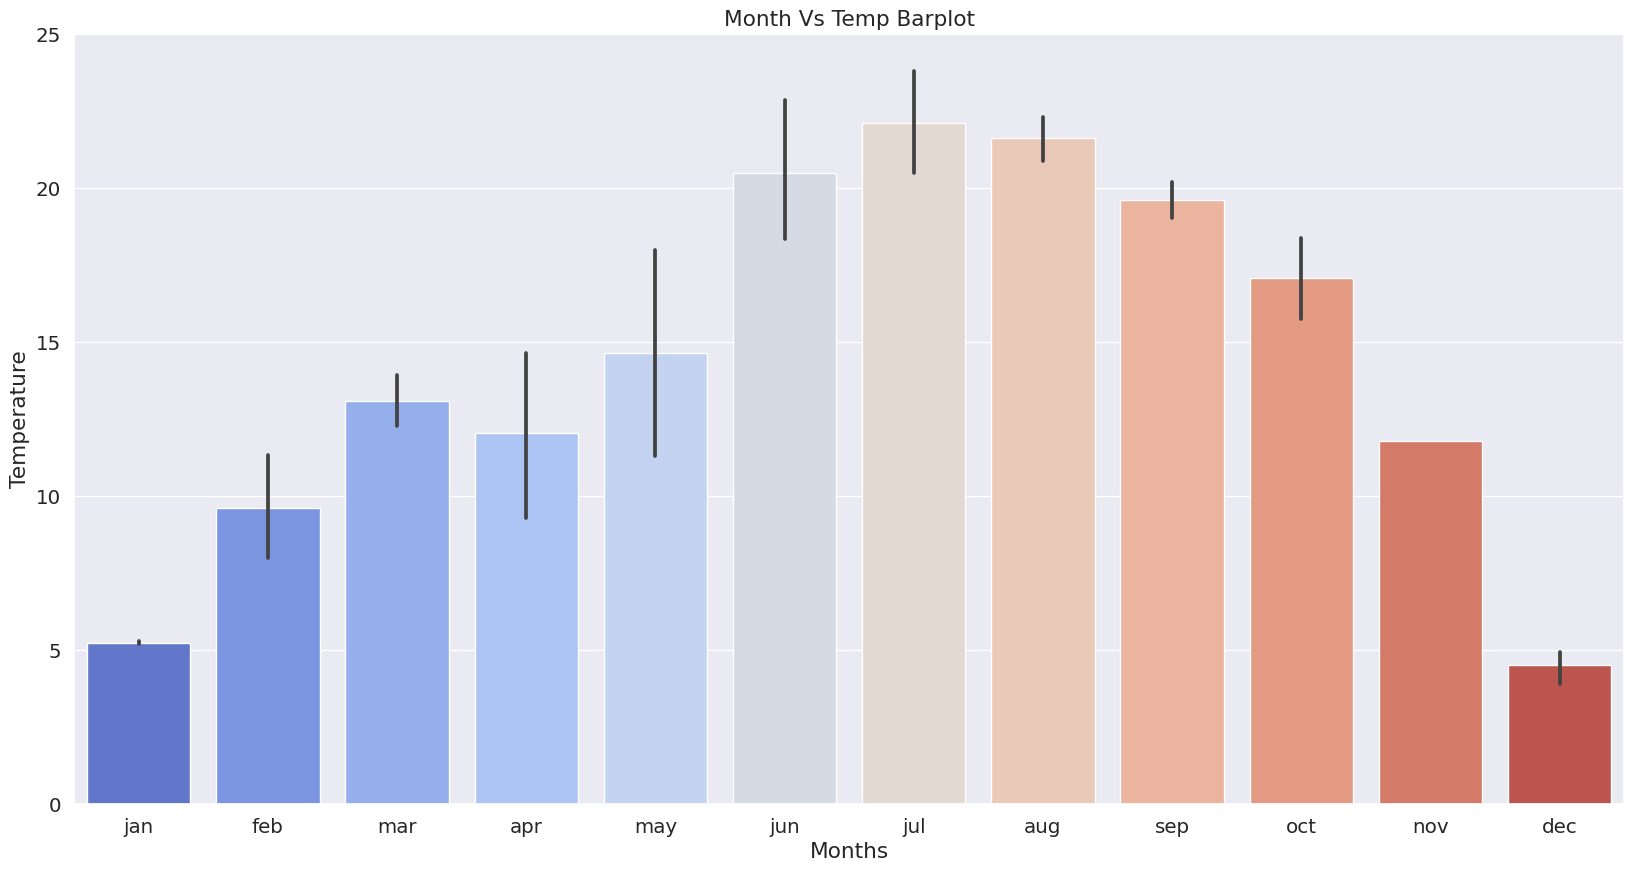

In [35]:
# setting parameters
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = raw_data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'coolwarm');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature")

<Axes: xlabel='X', ylabel='Y'>

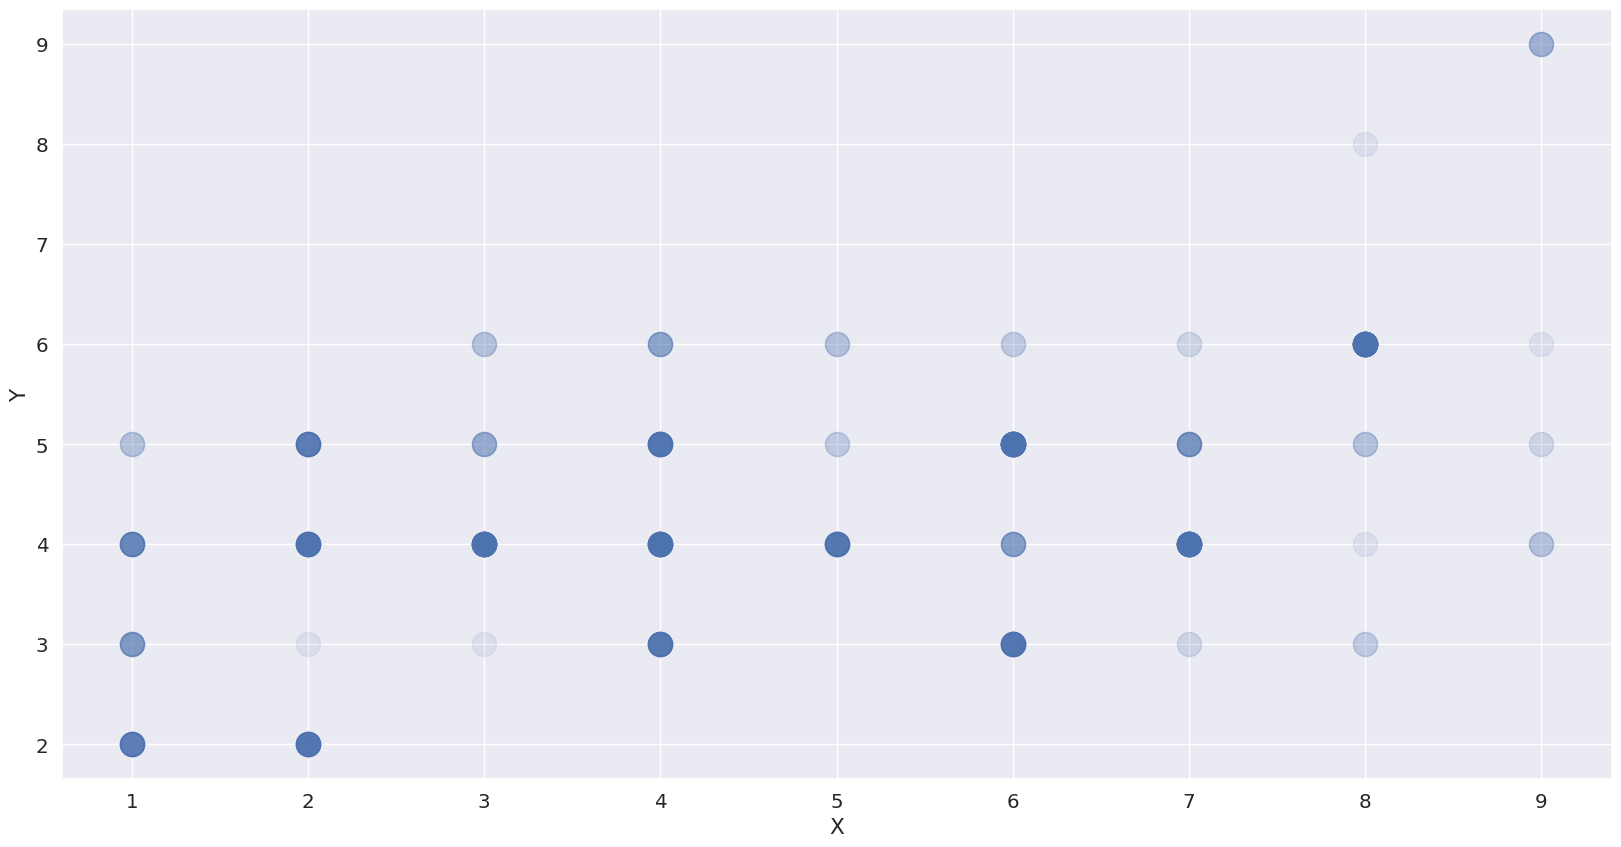

In [36]:
raw_data.plot(kind='scatter', x='X', y='Y', alpha=0.1, s=300) # scatter plot for the dataset

Text(0.5, 1.0, 'Burnt area in different regions of the park')

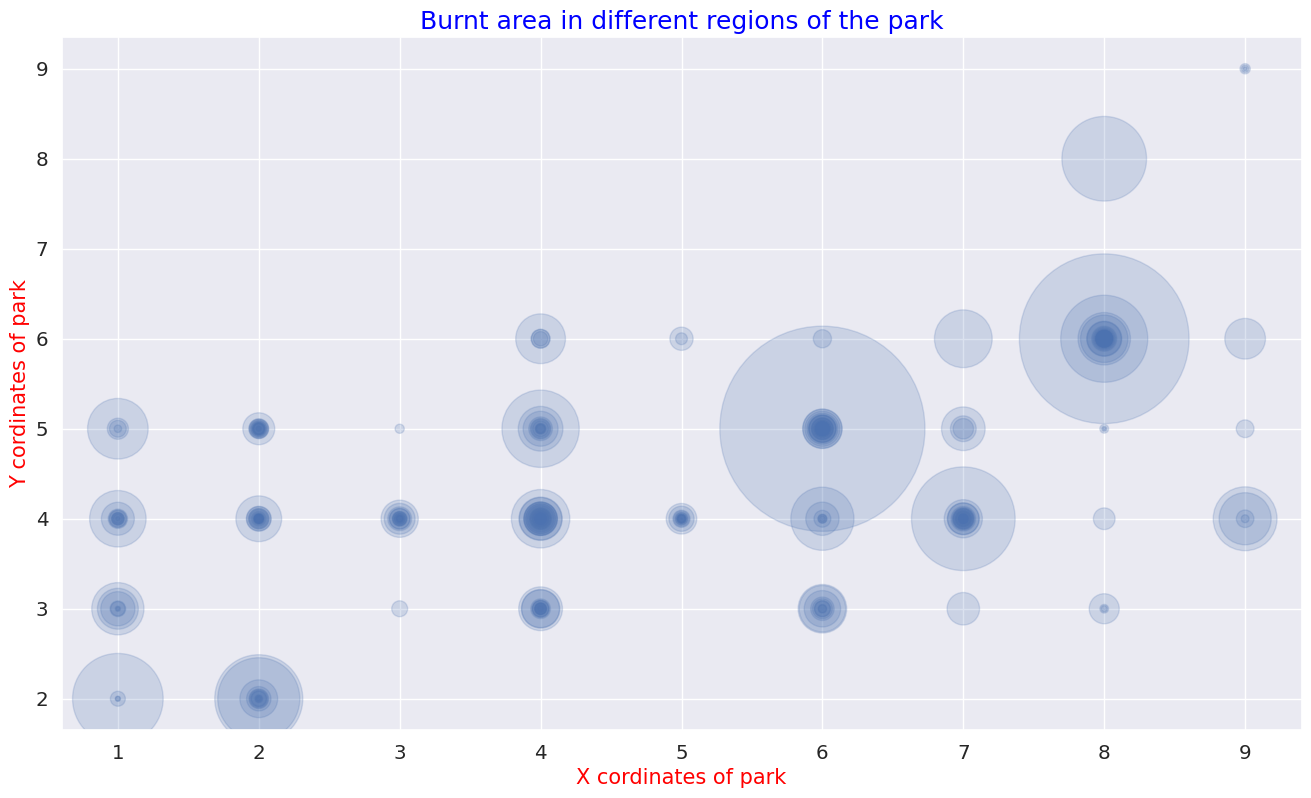

In [37]:
# Analysis of Burnt area based on spatial cordinates(X,Y)
raw_data.plot(kind='scatter', x='X', y='Y', alpha=0.2, s=20*raw_data['area'],figsize=(16,9))
plt.xlabel('X cordinates of park',color='red',fontsize=15)
plt.ylabel('Y cordinates of park',color='red',fontsize=15)
plt.title('Burnt area in different regions of the park',color='blue',fontsize=18)

### Observations:
**From the above scatter plot of 9X9 representation of park we can see that there are multiple hotspots for burnt area.**

* The cordinates (6,5) show intense burnt area.

* By applying maximum and minimum function on area columns.

we can deduce the min burned area is at (1,2) cordinates whereas
 max burned area is at (9,9) cordinates

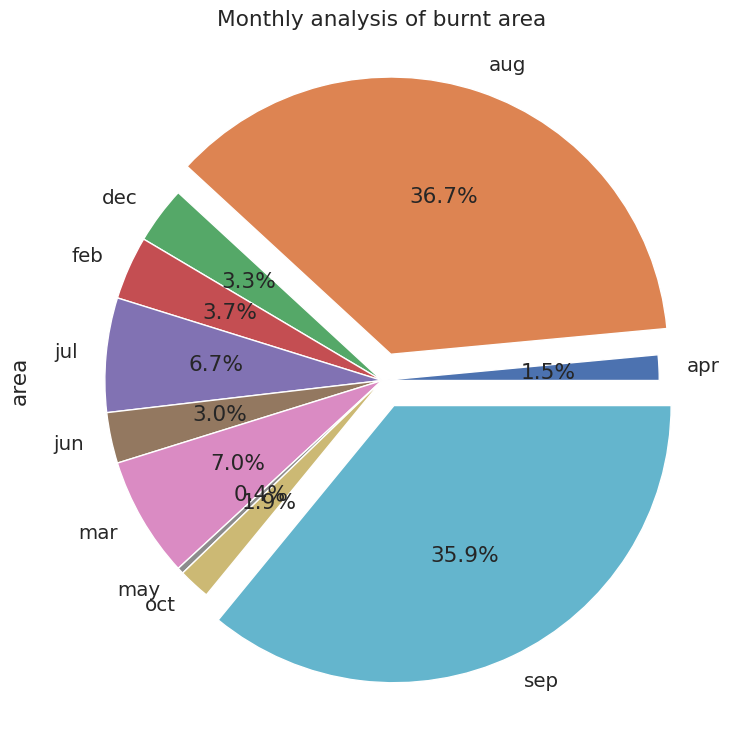

In [38]:
# monthly analysis of burnt area, where the condition is: area>0
areaburnt=raw_data[raw_data['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.1,0,0,0,0,0,0,0,0.1],autopct='%0.1f%%')
plt.show()

**Observations:**
* As we can see from the above pie chart,the month of aug and sep have recorded highest % of forest fire i.e 36.8% & 36.1% respectively.

* Month that recorded least forest fire is may with 0.4%.

In [39]:
## Visualize the Large Forest Fire Size rate by month
df1=raw_data.copy()
order={'month':{'jan':'January','feb':'February','mar':'March','apr':'April','may':'May','jun':'June','jul':'July','aug':'August','sep':'September','oct':'October','nov':'November','dec':'December'}}
df1=df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month.drop('month',axis = 1,inplace = True)
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
month

% Small Forest Fire  % Large Forest Fire
January             100.000000             0.000000
February             70.000000            30.000000
March                77.777778            22.222222
April                77.777778            22.222222
May                  50.000000            50.000000
June                 82.352941            17.647059
July                 71.875000            28.125000
August               76.630435            23.369565
September            70.348837            29.651163
October              73.333333            26.666667
November            100.000000             0.000000
December             11.111111            88.888889

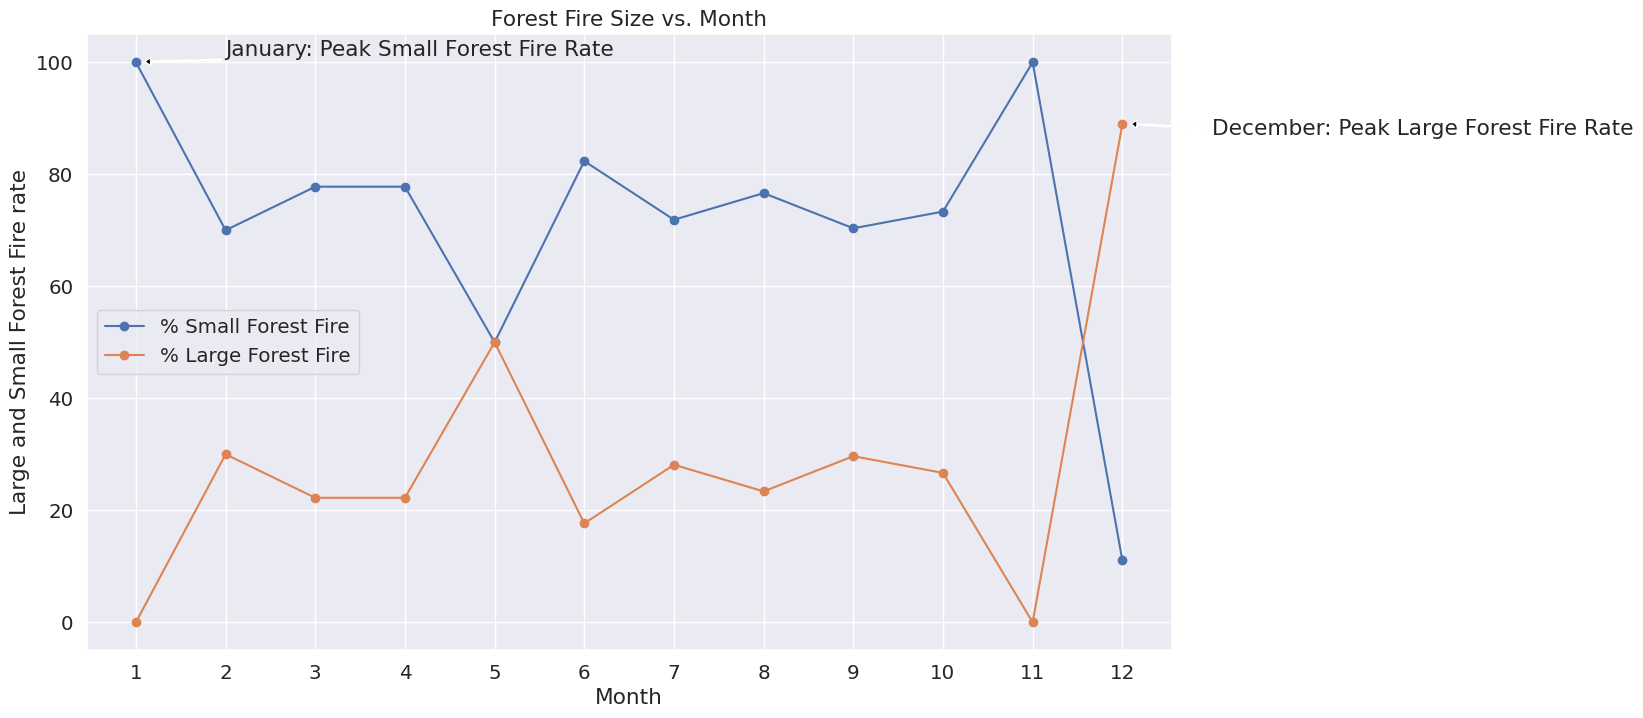

In [40]:
# Step 4: Change 'month' from words to numbers for easier analysis
df1=raw_data.copy()
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df1=df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month.drop('month',axis = 1,inplace = True)
month['Month'] = ['August','September','March','July','February','June','October','April','December','January','May','November']
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
plot_month = month[['% Small Forest Fire','% Large Forest Fire']].plot(kind ='line',
                                                          figsize = (14,8),
                                                          marker = 'o')

plt.title('Forest Fire Size vs. Month')
plt.ylabel('Large and Small Forest Fire rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of Small fire rate
y = month['% Small Forest Fire'].max()
x = month['% Small Forest Fire'].idxmax()
plt.annotate('January: Peak Small Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of large fire rate
y = month['% Large Forest Fire'].max()
x = month['% Large Forest Fire'].idxmax()
plt.annotate('December: Peak Large Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

In [41]:
data_ = raw_data.copy()
data_.drop('size_category',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  month_nov  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...          0   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...          0   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...          0   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...          0   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...          0   

   month_oct  month_sep  day_fri  day_mon  day_sat  day_sun  day_thu  day_tue  \
0          0          0        1        0        0        0        0        0   
1          1          0        0        0        0        0        0        1   
2          1          0        0        0        1        0        0        0   
3          0          0        1        0        0        0        0        0   
4          0          0        0        0        0        1        0        0   

   day_wed  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 29 columns]

Text(0.5, 1.0, 'Correlation with Forest Fire Size Category \n')

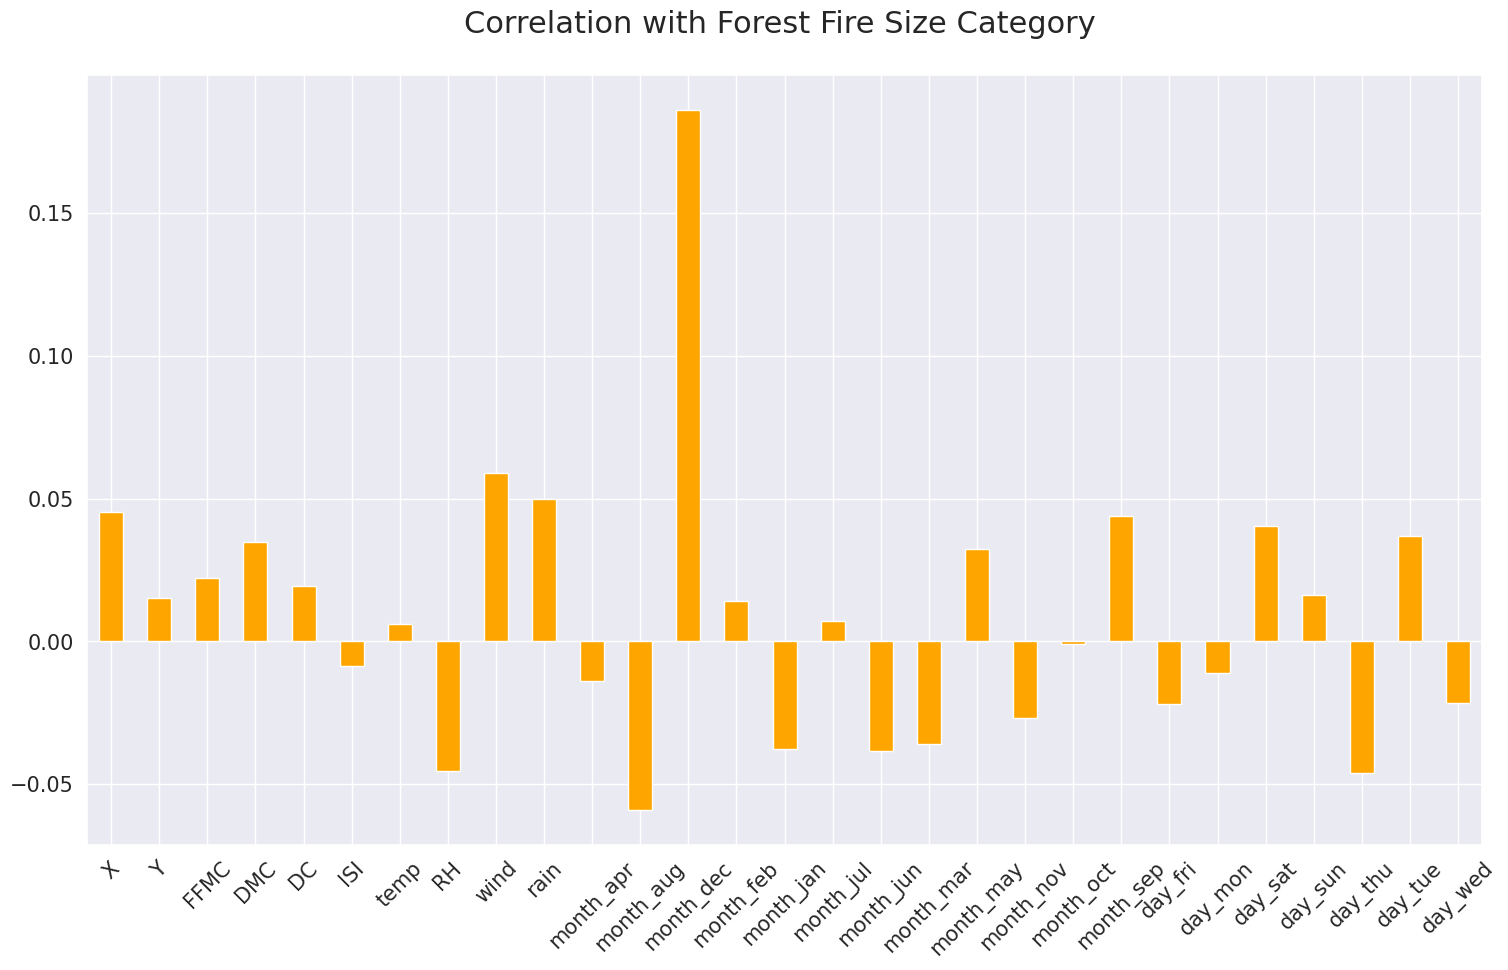

In [42]:
df=raw_data.copy()
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)

correlations = data_.corrwith(df.size_category)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Forest Fire Size Category \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

**Analysis of the response column**

It is very important to look at the response column, which holds the information, which we are going to predict. In our case we should look at 'size_category' column and compare its values to other columns. First of all we should look at the category 'small' and 'large' in the Dependent column 'size-category'.

In [43]:
raw_data.size_category.unique()

array(['small', 'large'], dtype=object)

In [44]:
## Checking for Imbalanced or balanced dataset with regards to the Target
countsizesmall = len(raw_data[raw_data.size_category == 'small'])
countsizelarge = len(raw_data[raw_data.size_category == 'large'])
print("Percentage of Small Forest Fire Size: {:.2f}%".format((countsizesmall / (len(raw_data.size_category))*100)))
print("Percentage of Large Foreset Fire Size: {:.2f}%".format((countsizelarge / (len(raw_data.size_category))*100)))

Percentage of Small Forest Fire Size: 73.11%
Percentage of Large Foreset Fire Size: 26.89%


Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

Here, the class “small” is called the majority class, and the much smaller in size “large” class is called the minority class.

In [45]:
raw_data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

Text(0.5, 1.0, 'Foeest Fire Size Category')

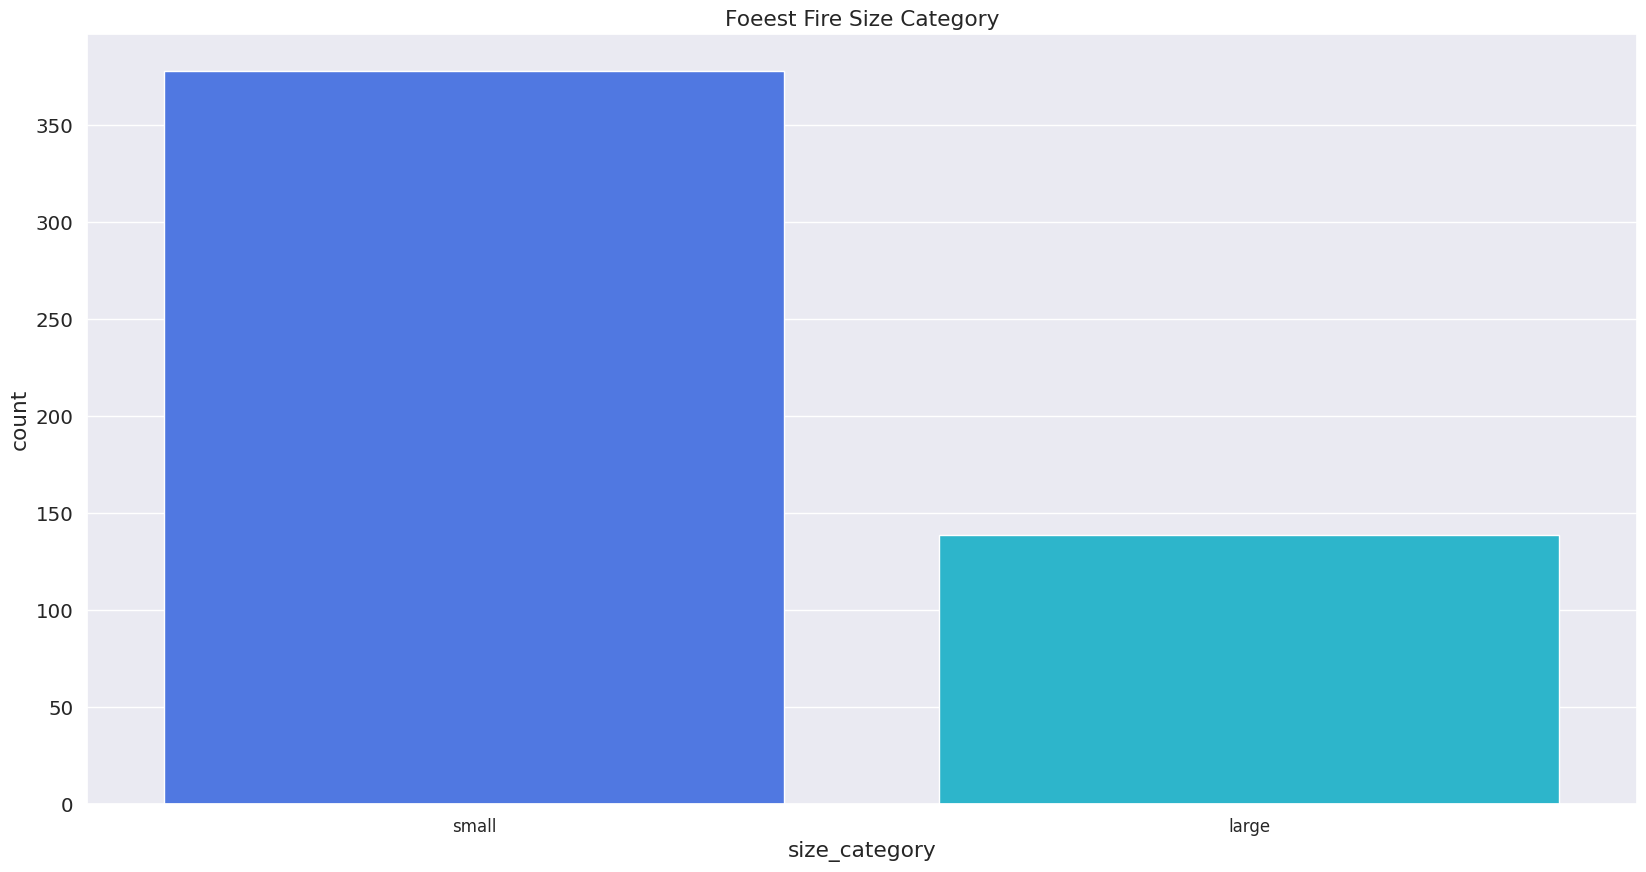

In [46]:
pal = sns.color_palette('rainbow')
sns.countplot(x='size_category', data=raw_data, palette = pal, 
              order=raw_data['size_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Foeest Fire Size Category')

Feature Engineering

In [48]:
continuous_feature=[feature for feature in raw_data.columns if raw_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 11


In [49]:
raw_data[continuous_feature]

X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 11 columns]

In [50]:
df_standard_scaled = raw_data.copy()
features = df_standard_scaled[continuous_feature]

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

X         Y month  day      FFMC       DMC        DC       ISI  \
0  1.008313  0.569860   mar  fri -0.805959 -1.323326 -1.830477 -0.860946   
1  1.008313 -0.244001   oct  tue -0.008102 -1.179541  0.488891 -0.509688   
2  1.008313 -0.244001   oct  sat -0.008102 -1.049822  0.560715 -0.509688   
3  1.440925  1.383722   mar  fri  0.191362 -1.212361 -1.898266 -0.004756   
4  1.440925  1.383722   mar  sun -0.243833 -0.931043 -1.798600  0.126966   

       temp        RH      wind      rain     area size_category  
0 -1.842640  0.411724  1.498614 -0.073268 -0.20202         small  
1 -0.153278 -0.692456 -1.741756 -0.073268 -0.20202         small  
2 -0.739383 -0.692456 -1.518282 -0.073268 -0.20202         small  
3 -1.825402  3.233519 -0.009834  0.603155 -0.20202         small  
4 -1.291012  3.356206 -1.238940 -0.073268 -0.20202         small

Now if we check the mean and standard deviation of our scaled data it should have a Mean '0' and Standard deviation '1'

In [52]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 X       0.0
Y       0.0
FFMC   -0.0
DMC    -0.0
DC      0.0
ISI     0.0
temp    0.0
RH      0.0
wind   -0.0
rain   -0.0
area    0.0
dtype: float64 
Standard Devaition 
 X       1.0
Y       1.0
FFMC    1.0
DMC     1.0
DC      1.0
ISI     1.0
temp    1.0
RH      1.0
wind    1.0
rain    1.0
area    1.0
dtype: float64 1


In [53]:
df = df_standard_scaled.copy()
df.drop('size_category',axis=1, inplace =True)
df = pd.get_dummies(df.iloc[:,:])
df.head()

X         Y      FFMC       DMC        DC       ISI      temp  \
0  1.008313  0.569860 -0.805959 -1.323326 -1.830477 -0.860946 -1.842640   
1  1.008313 -0.244001 -0.008102 -1.179541  0.488891 -0.509688 -0.153278   
2  1.008313 -0.244001 -0.008102 -1.049822  0.560715 -0.509688 -0.739383   
3  1.440925  1.383722  0.191362 -1.212361 -1.898266 -0.004756 -1.825402   
4  1.440925  1.383722 -0.243833 -0.931043 -1.798600  0.126966 -1.291012   

         RH      wind      rain  ...  month_nov  month_oct  month_sep  \
0  0.411724  1.498614 -0.073268  ...          0          0          0   
1 -0.692456 -1.741756 -0.073268  ...          0          1          0   
2 -0.692456 -1.518282 -0.073268  ...          0          1          0   
3  3.233519 -0.009834  0.603155  ...          0          0          0   
4  3.356206 -1.238940 -0.073268  ...          0          0          0   

   day_fri  day_mon  day_sat  day_sun  day_thu  day_tue  day_wed  
0        1        0        0        0        0        0        0  
1        0        0        0        0        0        1        0  
2        0        0        1        0        0        0        0  
3        1        0        0        0        0        0        0  
4        0        0        0        1        0        0        0  

[5 rows x 30 columns]

In [54]:
# Converting string value into binary classes such as if "large" than classify it as '1' else 'O'
df['size_category'] = raw_data.size_category
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)
df.head()

X         Y      FFMC       DMC        DC       ISI      temp  \
0  1.008313  0.569860 -0.805959 -1.323326 -1.830477 -0.860946 -1.842640   
1  1.008313 -0.244001 -0.008102 -1.179541  0.488891 -0.509688 -0.153278   
2  1.008313 -0.244001 -0.008102 -1.049822  0.560715 -0.509688 -0.739383   
3  1.440925  1.383722  0.191362 -1.212361 -1.898266 -0.004756 -1.825402   
4  1.440925  1.383722 -0.243833 -0.931043 -1.798600  0.126966 -1.291012   

         RH      wind      rain  ...  month_oct  month_sep  day_fri  day_mon  \
0  0.411724  1.498614 -0.073268  ...          0          0        1        0   
1 -0.692456 -1.741756 -0.073268  ...          1          0        0        0   
2 -0.692456 -1.518282 -0.073268  ...          1          0        0        0   
3  3.233519 -0.009834  0.603155  ...          0          0        1        0   
4  3.356206 -1.238940 -0.073268  ...          0          0        0        0   

   day_sat  day_sun  day_thu  day_tue  day_wed  size_category  
0        0        0        0        0        0              0  
1        0        0        0        1        0              0  
2        1        0        0        0        0              0  
3        0        0        0        0        0              0  
4        0        1        0        0        0              0  

[5 rows x 31 columns]

In [55]:
df.size_category.unique()

array([0, 1])

Feature Selection Technique

In [56]:
forest_fire.drop(['month','day','area'] ,axis=1, inplace= True)

In [57]:
data_ = forest_fire.copy()
data_.drop('size_category',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  dayfri  daymon  ...  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0       1       0  ...   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0       0       0  ...   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0       0       0  ...   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2       1       0  ...   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0       0       0  ...   

   monthaug  monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  \
0         0         0         0         0         0         0         1   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         1   
4         0         0         0         0         0         0         1   

   monthmay  monthnov  monthoct  
0         0         0         0  
1         0         0         1  
2         0         0         1  
3         0         0         0  
4         0         0         0  

[5 rows x 26 columns]

In [58]:
data_['size_category'] = df1.size_category
data_.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  dayfri  daymon  ...  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0       1       0  ...   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0       0       0  ...   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0       0       0  ...   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2       1       0  ...   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0       0       0  ...   

   monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0         0         0         0         0         0         1         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         1         0   
4         0         0         0         0         0         1         0   

   monthnov  monthoct  size_category  
0         0         0          small  
1         0         1          small  
2         0         1          small  
3         0         0          small  
4         0         0          small  

[5 rows x 27 columns]

In [59]:
le = LabelEncoder()
le.fit(data_["size_category"])
data_["size_category"]=le.transform(data_["size_category"])
data_.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  dayfri  daymon  ...  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0       1       0  ...   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0       0       0  ...   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0       0       0  ...   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2       1       0  ...   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0       0       0  ...   

   monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0         0         0         0         0         0         1         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         1         0   
4         0         0         0         0         0         1         0   

   monthnov  monthoct  size_category  
0         0         0              1  
1         0         1              1  
2         0         1              1  
3         0         0              1  
4         0         0              1  

[5 rows x 27 columns]

In [60]:
# split into input (X) and output (y) variables
X = data_.drop('size_category', axis = 1)

y=  data_.size_category

In [61]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [62]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [63]:
# summarize scores
scores = fit.scores_

features = fit.transform(X)

In [64]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

Score   Feature
1   23.006108       DMC
2   21.872657        DC
17  17.601210  monthdec
5    6.350054        RH
7    5.216072      rain
6    1.440661      wind
16   1.157358  monthaug
12   0.964276    daythu
21   0.738170  monthjun
19   0.735450  monthjan
10   0.706636    daysat
13   0.620080    daytue
22   0.597478  monthmar
23   0.543575  monthmay
24   0.367725  monthnov
14   0.217190    daywed
8    0.205497    dayfri
11   0.113897    daysun
15   0.099580  monthapr
18   0.098668  monthfeb
3    0.090542       ISI
0    0.084434      FFMC
9    0.055135    daymon
4    0.033386      temp
20   0.024995  monthjul
25   0.000367  monthoct

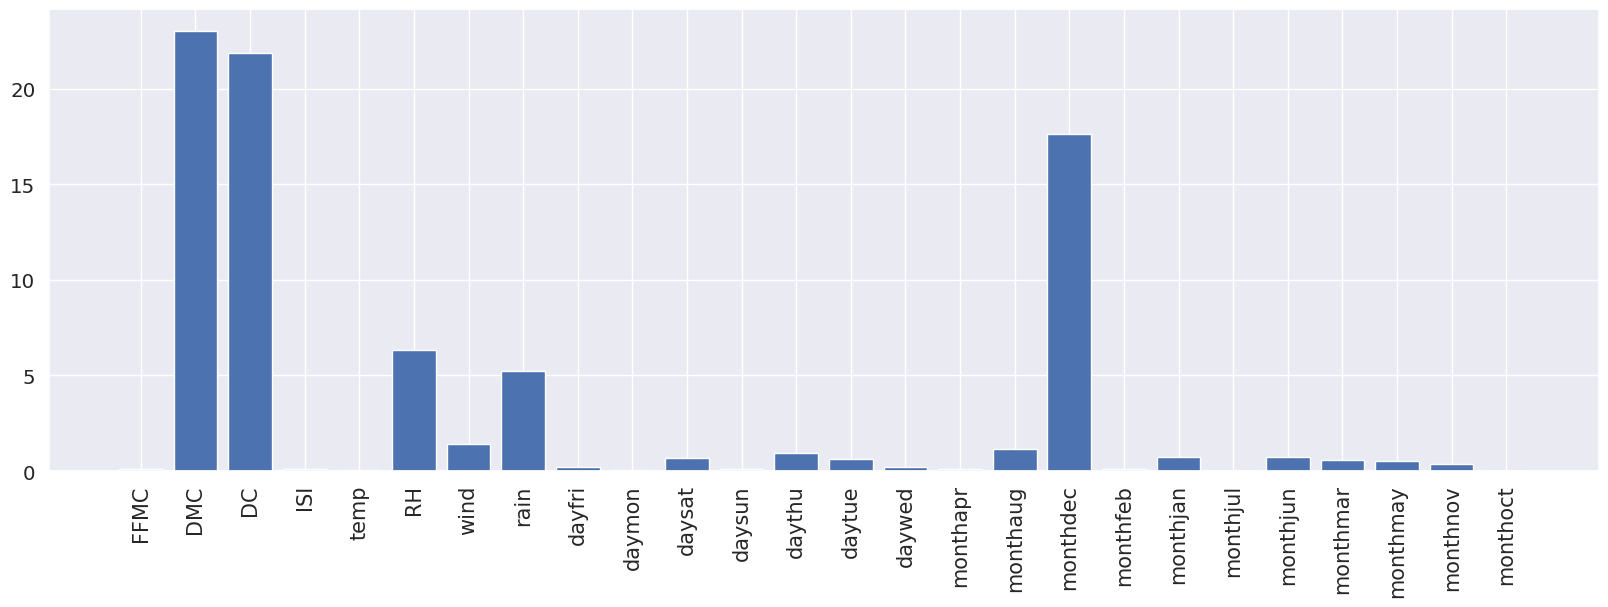

In [65]:
# [0,1,2,3,4,5,6,7,8]
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks(range(len(scores)))
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()


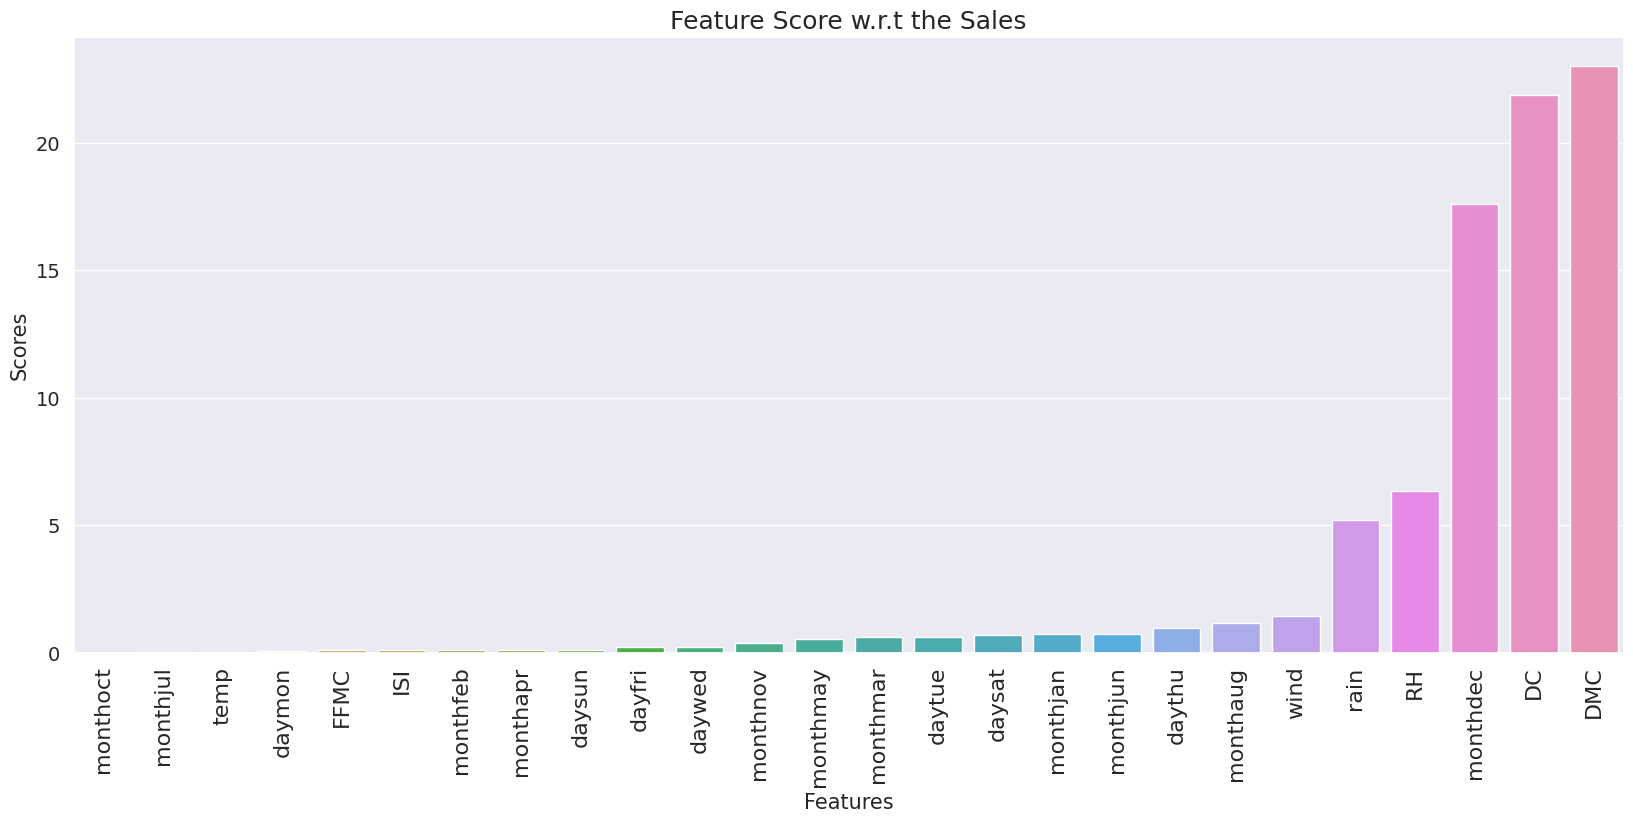

In [66]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [67]:
model_data=df[['DMC','DC','RH','rain','wind','area','month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep','size_category']]
model_data

DMC        DC        RH      rain      wind      area  month_apr  \
0   -1.323326 -1.830477  0.411724 -0.073268  1.498614 -0.202020          0   
1   -1.179541  0.488891 -0.692456 -0.073268 -1.741756 -0.202020          0   
2   -1.049822  0.560715 -0.692456 -0.073268 -1.518282 -0.202020          0   
3   -1.212361 -1.898266  3.233519  0.603155 -0.009834 -0.202020          0   
4   -0.931043 -1.798600  3.356206 -0.073268 -1.238940 -0.202020          0   
..        ...       ...       ...       ...       ...       ...        ...   
512 -0.846648  0.474768 -0.753800 -0.073268 -0.736124 -0.100753          0   
513 -0.846648  0.474768  1.638592 -0.073268  0.995798  0.651674          0   
514 -0.846648  0.474768  1.577248 -0.073268  1.498614 -0.026532          0   
515  0.549003  0.269382 -0.140366 -0.073268 -0.009834 -0.202020          0   
516 -1.685913 -1.780442 -0.815143 -0.073268  0.269509 -0.202020          0   

     month_aug  month_dec  month_feb  month_jan  month_jul  month_jun  \
0            0          0          0          0          0          0   
1            0          0          0          0          0          0   
2            0          0          0          0          0          0   
3            0          0          0          0          0          0   
4            0          0          0          0          0          0   
..         ...        ...        ...        ...        ...        ...   
512          1          0          0          0          0          0   
513          1          0          0          0          0          0   
514          1          0          0          0          0          0   
515          1          0          0          0          0          0   
516          0          0          0          0          0          0   

     month_mar  month_may  month_nov  month_oct  month_sep  size_category  
0            1          0          0          0          0              0  
1            0          0          0          1          0              0  
2            0          0          0          1          0              0  
3            1          0          0          0          0              0  
4            1          0          0          0          0              0  
..         ...        ...        ...        ...        ...            ...  
512          0          0          0          0          0              1  
513          0          0          0          0          0              1  
514          0          0          0          0          0              1  
515          0          0          0          0          0              0  
516          0          0          1          0          0              0  

[517 rows x 19 columns]

Test Train Split

In [68]:
x = model_data.drop('size_category',axis=1)
y = model_data[['size_category']]

In [69]:
# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3, stratify=y)

Hyperparameter Tuning

In [70]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [71]:
tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=5,  executions_per_trial=3,directory='project',project_name='Forest Fire')

In [72]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [73]:
tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))

Trial 5 Complete [00h 01m 52s]
val_accuracy: 0.9059829115867615

Best val_accuracy So Far: 0.9572649598121643
Total elapsed time: 00h 06m 00s


In [75]:
tuner.results_summary()

Results summary
Results in project/Forest Fire
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
num_layers: 17
units_0: 96
units_1: 32
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
Score: 0.9572649598121643

Trial 3 summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 64
learning_rate: 0.001
units_2: 64
units_3: 96
units_4: 64
units_5: 96
units_6: 96
units_7: 64
units_8: 64
units_9: 64
units_10: 64
units_11: 32
units_12: 32
units_13: 64
units_14: 96
units_15: 32
units_16: 64
Score: 0.9551282127698263

Trial 2 summary
Hyperparameters:
num_layers: 11
units_0: 64
units_1: 64
learning_rate: 0.001
units_2: 32
units_3: 64
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 96
units_10: 96
units_11: 96
units_12: 64
units_13: 32
units_14: 96
units_15: 32
u

Hyperparameter Tuning: Optimal Batch_size, Number of Epochs

In [76]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(64,input_dim=18,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(learning_rate=0.01)
    model1.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model1

In [79]:
model1 =KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid_result = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [84]:
grid_result.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=0.945 total time=   2.7s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=0.931 total time=   3.8s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.944 total time=   4.2s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=0.931 total time=   1.7s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=0.917 total time=   2.2s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ....batch_size=10, epochs=50;

[CV 3/5; 9/16] END ....batch_size=40, epochs=10;, score=0.889 total time=   1.2s
[CV 4/5; 9/16] START batch_size=40, epochs=10...................................


[CV 4/5; 9/16] END ....batch_size=40, epochs=10;, score=0.931 total time=   1.2s
[CV 5/5; 9/16] START batch_size=40, epochs=10...................................
[CV 5/5; 9/16] END ....batch_size=40, epochs=10;, score=0.861 total time=   1.3s
[CV 1/5; 10/16] START batch_size=40, epochs=50..................................
[CV 1/5; 10/16] END ...batch_size=40, epochs=50;, score=0.986 total time=   3.8s
[CV 2/5; 10/16] START batch_size=40, epochs=50..................................
[CV 2/5; 10/16] END ...batch_size=40, epochs=50;, score=0.903 total time=   1.9s
[CV 3/5; 10/16] START batch_size=40, epochs=50..................................
[CV 3/5; 10/16] END ...batch_size=40, epochs=50;, score=0.958 total time=   1.8s
[CV 4/5; 10/16] START batch_size=40, epochs=50..................................
[CV 4/5; 10/16] END ...batch_size=40, epochs=50;, score=0.944 total time=   2.0s
[CV 5/5; 10/16] START batch_size=40, epochs=50..................................
[CV 5/5; 10/16] END ...batch

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc7a022a1f0>,
             param_grid={'batch_size': [10, 20, 40, 50],
                         'epochs': [10, 50, 100, 200]},
             verbose=10)

In [85]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9472602605819702, using {'batch_size': 10, 'epochs': 100}
0.9334855437278747,0.010559322297062867 with {'batch_size': 10, 'epochs': 10}
0.9444824934005738,0.03291539224432849 with {'batch_size': 10, 'epochs': 50}
0.9472602605819702,0.02228883721599505 with {'batch_size': 10, 'epochs': 100}
0.9388888955116272,0.03788383076314471 with {'batch_size': 10, 'epochs': 200}
0.9057077765464783,0.05730214086464238 with {'batch_size': 20, 'epochs': 10}
0.933371388912201,0.03221757950759392 with {'batch_size': 20, 'epochs': 50}
0.9361491560935974,0.032452936378438366 with {'batch_size': 20, 'epochs': 100}
0.9444824934005738,0.03833047811502908 with {'batch_size': 20, 'epochs': 200}
0.9085236072540284,0.02874896038728589 with {'batch_size': 40, 'epochs': 10}
0.9333713769912719,0.039725254009014714 with {'batch_size': 40, 'epochs': 50}
0.9389269351959229,0.03690018724712884 with {'batch_size': 40, 'epochs': 100}
0.92781583070755,0.03670200580194937 with {'batch_size': 40, 'epochs': 200}
0.902

Hyperparameter Tuning: Optimal Droupout rate

In [86]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(64,input_dim=18,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(lr=0.01)
    model2.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model2

In [87]:
model2=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [88]:
grid_result2 = grid2.fit(x_test,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................
[CV 1/5; 1/6] END .............dropout_rate=0.0;, score=0.875 total time=   6.1s
[CV 2/5; 1/6] START dropout_rate=0.0............................................
[CV 2/5; 1/6] END .............dropout_rate=0.0;, score=0.968 total time=   6.0s
[CV 3/5; 1/6] START dropout_rate=0.0............................................
[CV 3/5; 1/6] END .............dropout_rate=0.0;, score=0.968 total time=   6.1s
[CV 4/5; 1/6] START dropout_rate=0.0............................................
[CV 4/5; 1/6] END .............dropout_rate=0.0;, score=1.000 total time=   6.0s
[CV 5/5; 1/6] START dropout_rate=0.0............................................
[CV 5/5; 1/6] END .............dropout_rate=0.0;, score=0.968 total time=   7.1s
[CV 1/5; 2/6] START dropout_rate=0.1............................................
[CV 1/5; 2/6] END .............dropout_rate=0.1;,

In [89]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9556451439857483, using {'dropout_rate': 0.0}
0.9556451439857483,0.04221371222927085 with {'dropout_rate': 0.0}
0.9556451439857483,0.04221371222927085 with {'dropout_rate': 0.1}
0.9427419304847717,0.041467609717480376 with {'dropout_rate': 0.2}
0.9556451439857483,0.04221371222927085 with {'dropout_rate': 0.3}
0.9556451439857483,0.04221371222927085 with {'dropout_rate': 0.4}
0.9491935253143311,0.03709676265716553 with {'dropout_rate': 0.5}


Hyperparameter Tuning: Optimal Activation Function and Kernel Initializer

In [90]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(64,input_dim=18,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.0))
    model3.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(lr=0.01)
    model3.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model3

In [91]:
model3=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

In [92]:
grid_result3 = grid3.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................
[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=0.875 total time=   6.1s
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................
[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=0.935 total time=   6.2s
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................
[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=0.935 total time=   3.9s
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................
[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=0.968 total time=   3.9s
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................
[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=0.968 total time=  11.2s
[CV 1/5; 2/9] START activation_function=softmax, init=uniform..............

In [93]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9556451439857483, using {'activation_function': 'relu', 'init': 'normal'}
0.9362903118133545,0.03387095701126977 with {'activation_function': 'softmax', 'init': 'normal'}
0.94919353723526,0.04233678433220251 with {'activation_function': 'softmax', 'init': 'uniform'}
0.9427419304847717,0.041467609717480376 with {'activation_function': 'softmax', 'init': 'zero'}
0.9427419185638428,0.03610164807752721 with {'activation_function': 'tanh', 'init': 'normal'}
0.9493951439857483,0.05427993920407009 with {'activation_function': 'tanh', 'init': 'uniform'}
0.9491935253143311,0.03709676265716553 with {'activation_function': 'tanh', 'init': 'zero'}
0.9556451439857483,0.04221371222927085 with {'activation_function': 'relu', 'init': 'normal'}
0.9491935253143311,0.03709676265716553 with {'activation_function': 'relu', 'init': 'uniform'}
0.94919353723526,0.051233487175148834 with {'activation_function': 'relu', 'init': 'zero'}


Building Neural Networks Model using Optimal Values

In [94]:
def toFindBestParams(x_train, y_train, x_test, y_test):
    #print(y_test.shape)
    #sys.exit()
    
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
           
    # initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
 
            # Fitting the ANN to the Training set
            model_trained = model.fit(x_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)
               
             # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]   
            
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
toFindBestParams(x_train, y_train, x_test, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.8393352031707764
batch_size: 5 - epochs: 10 Accuracy: 0.9390581846237183
batch_size: 5 - epochs: 50 Accuracy: 0.9944598078727722
batch_size: 5 - epochs: 100 Accuracy: 0.9861496090888977
batch_size: 10 - epochs: 5 Accuracy: 0.7700831294059753
batch_size: 10 - epochs: 10 Accuracy: 0.861495852470398
batch_size: 10 - epochs: 50 Accuracy: 0.9861496090888977
batch_size: 10 - epochs: 100 Accuracy: 0.9889196753501892
batch_size: 15 - epochs: 5 Accuracy: 0.7562326788902283
batch_size: 15 - epochs: 10 Accuracy: 0.8199446201324463
batch_size: 15 - epochs: 50 Accuracy: 0.9944598078727722
batch_size: 15 - epochs: 100 Accuracy: 0.9944598078727722
batch_size: 20 - epochs: 5 Accuracy: 0.7506925463676453
batch_size: 20 - epochs: 10 Accuracy: 0.7700831294059753
batch_size: 20 - epochs: 50 Accuracy: 0.9889196753501892
batch_size: 20 - epochs: 100 Accuracy: 0.9944598078727722


Training Model - using best params

In [103]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train)

12/12 [==============================] - 1s 3ms/step - loss: 2.4807 - accuracy: 0.0609 


In [104]:
 # create ANN model
model = Sequential()
# Defining the first layer of the model
model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))        
# Defining the Second layer of the model
model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))  
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 0.6846 - accuracy: 0.7469 - val_loss: 0.6807 - val_accuracy: 0.6833
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6603 - accuracy: 0.7635 - val_loss: 0.6554 - val_accuracy: 0.7083
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6112 - accuracy: 0.7676 - val_loss: 0.6158 - val_accuracy: 0.7167
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5553 - accuracy: 0.7718 - val_loss: 0.5852 - val_accuracy: 0.7167
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5204 - accuracy: 0.7718 - val_loss: 0.5710 - val_accuracy: 0.7333
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.5017 - accuracy: 0.7759 - val_loss: 0.5602 - val_accuracy: 0.7333
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4868 - accuracy: 0.7884 - val_loss: 0.5498 - val_accuracy: 0.7417
Epoch 8/100


In [105]:
# evaluate the model
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.1007 - accuracy: 0.9807
accuracy: 98.07%


In [106]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

compare the train-set and test-set accuracy to check for overfitting.

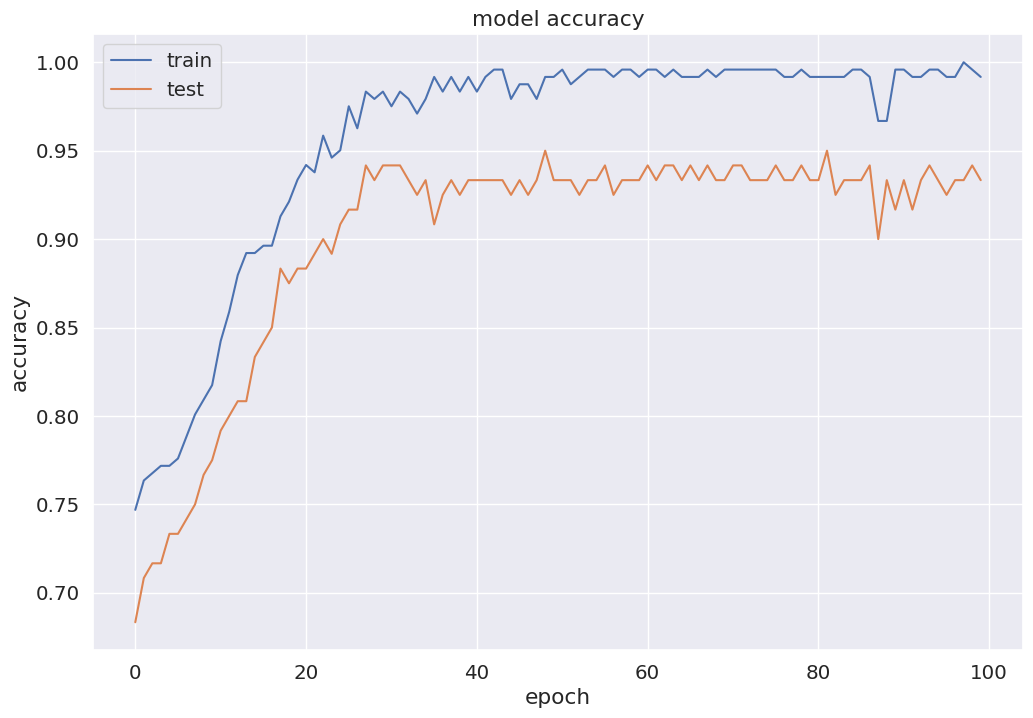

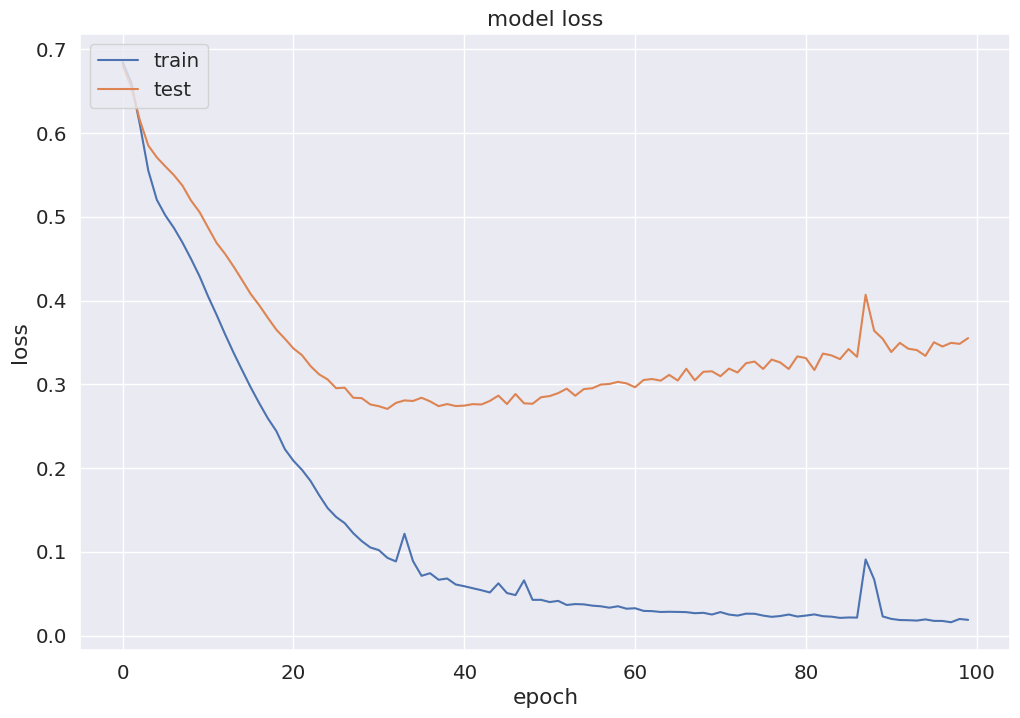

In [107]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


The training-error converged but the testing error didn't converge and conincide with the training error . Hence, We can do better with Hyperparameter Tuning all the parameters which is computationally Expensive.

**Predicting values from Model using same dataset**

In [108]:
# generating predictions for test data
y_predict_test = model.predict(x_test) 

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test.size_category
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

5/5 [==============================] - 0s 3ms/step
(156, 3)


Test_Actual  Test_Probability  Test_Predicted
493            1          0.997260               1
298            0          0.001680               0
93             0          0.002039               0
437            0          0.002323               0
340            0          0.024606               0
7              0          0.001957               0
172            0          0.005959               0
76             0          0.002357               0
148            0          0.002521               0
104            0          0.001710               0

In [109]:
# generating predictions for train data
y_predict_train = model.predict(x_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train.size_category
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

12/12 [==============================] - 0s 2ms/step
(361, 3)


Train_Actual  Train_Probability  Train_Predicted
115             0           0.002951                0
130             0           0.002512                0
413             0           0.002423                0
350             0           0.008999                0
103             0           0.002010                0
511             0           0.002110                0
325             0           0.002108                0
473             1           0.997260                1
265             0           0.002106                0
226             1           0.997260                1

Classification Report

In [110]:
# print the classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy score for Test Data    = ", np.round(accuracy_score(test_prediction['Test_Actual'],test_prediction['Test_Predicted']),2)*100,"%")
print("Confusion Matrix for Test Data  =\n", confusion_matrix(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))
print("Classification Report for Test Data  =\n", classification_report(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))

Accuracy score for Test Data    =  99.0 %
Confusion Matrix for Test Data  =
 [[112   2]
 [  0  42]]
Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       114
           1       0.95      1.00      0.98        42

    accuracy                           0.99       156
   macro avg       0.98      0.99      0.98       156
weighted avg       0.99      0.99      0.99       156



In [111]:
# print the classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy score for Train Data    = ", np.round(accuracy_score(train_prediction['Train_Actual'],train_prediction['Train_Predicted']),2)*100,"%")
print("Confusion Matrix for Train Data  =\n", confusion_matrix(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))
print("Classification Report for Train Data  =\n", classification_report(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))

Accuracy score for Train Data    =  98.0 %
Confusion Matrix for Train Data  =
 [[261   3]
 [  5  92]]
Classification Report for Train Data  =
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       264
           1       0.97      0.95      0.96        97

    accuracy                           0.98       361
   macro avg       0.97      0.97      0.97       361
weighted avg       0.98      0.98      0.98       361



Classification report shows the precision, recall, F1 and support scores for the Logistic Regression classification model.

* Precision of 0 represents that for all instances predicted as small size fire, the percentage of fire that actually small is 98%.

* Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all fire that is actually small, the model predicts 99% correctly that there would be small fire.

In general, the report shows that Neural Networks model using Linear Kernel has great predictive power to identify the fire size that would be either small or large int the Forest.

In [112]:
# print the scores on training and test set
y_predict_test = model.predict(x_test) 
y_predict_train = model.predict(x_train)
print('Training set score: {:.2f}%'.format(accuracy_score(train_prediction['Train_Actual'], train_prediction['Train_Predicted'])*100))

print('Test set score: {:.2f}%'.format(accuracy_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])*100))

12/12 [==============================] - 0s 3ms/step
Training set score: 97.78%
Test set score: 98.72%


Confusion matrix

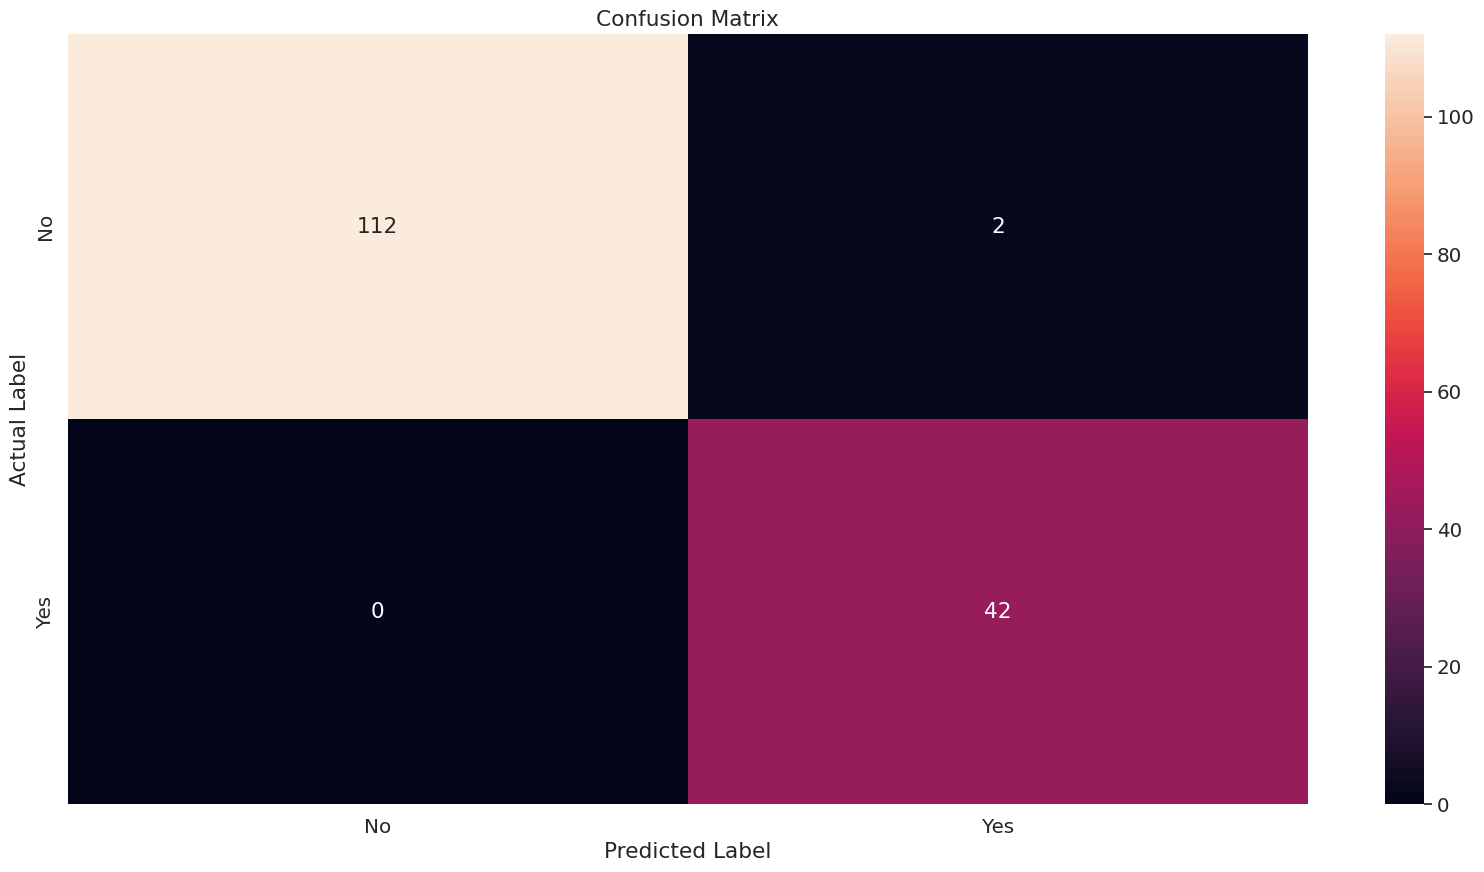

In [113]:
# plot confusion matrix to describe the performance of classifier.

cm_df=confusion_matrix(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

ROC - AUC Curve

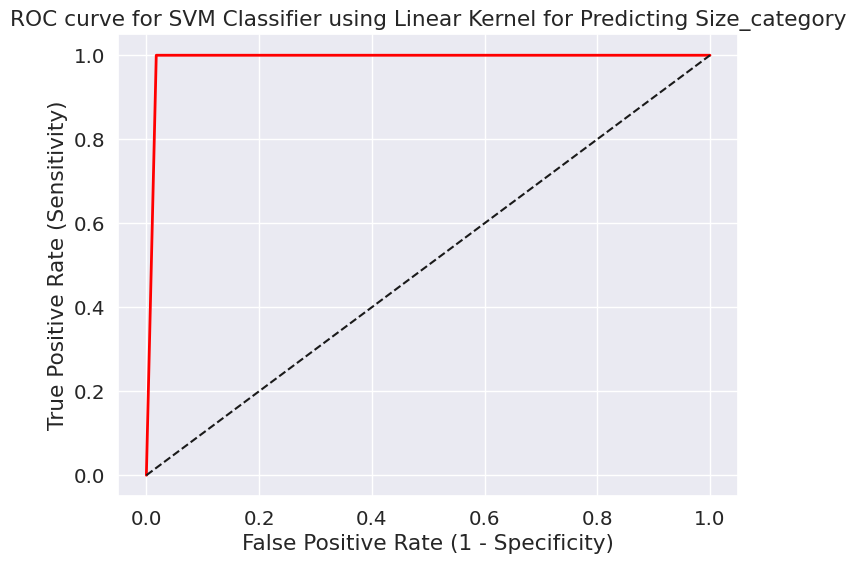

ROC AUC : 0.9912


In [114]:
fpr, tpr, thresholds = roc_curve(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])

plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC_AUC = roc_auc_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])

print('ROC AUC : {:.4f}'.format(ROC_AUC))

Text(0, 0.5, 'Frequency')

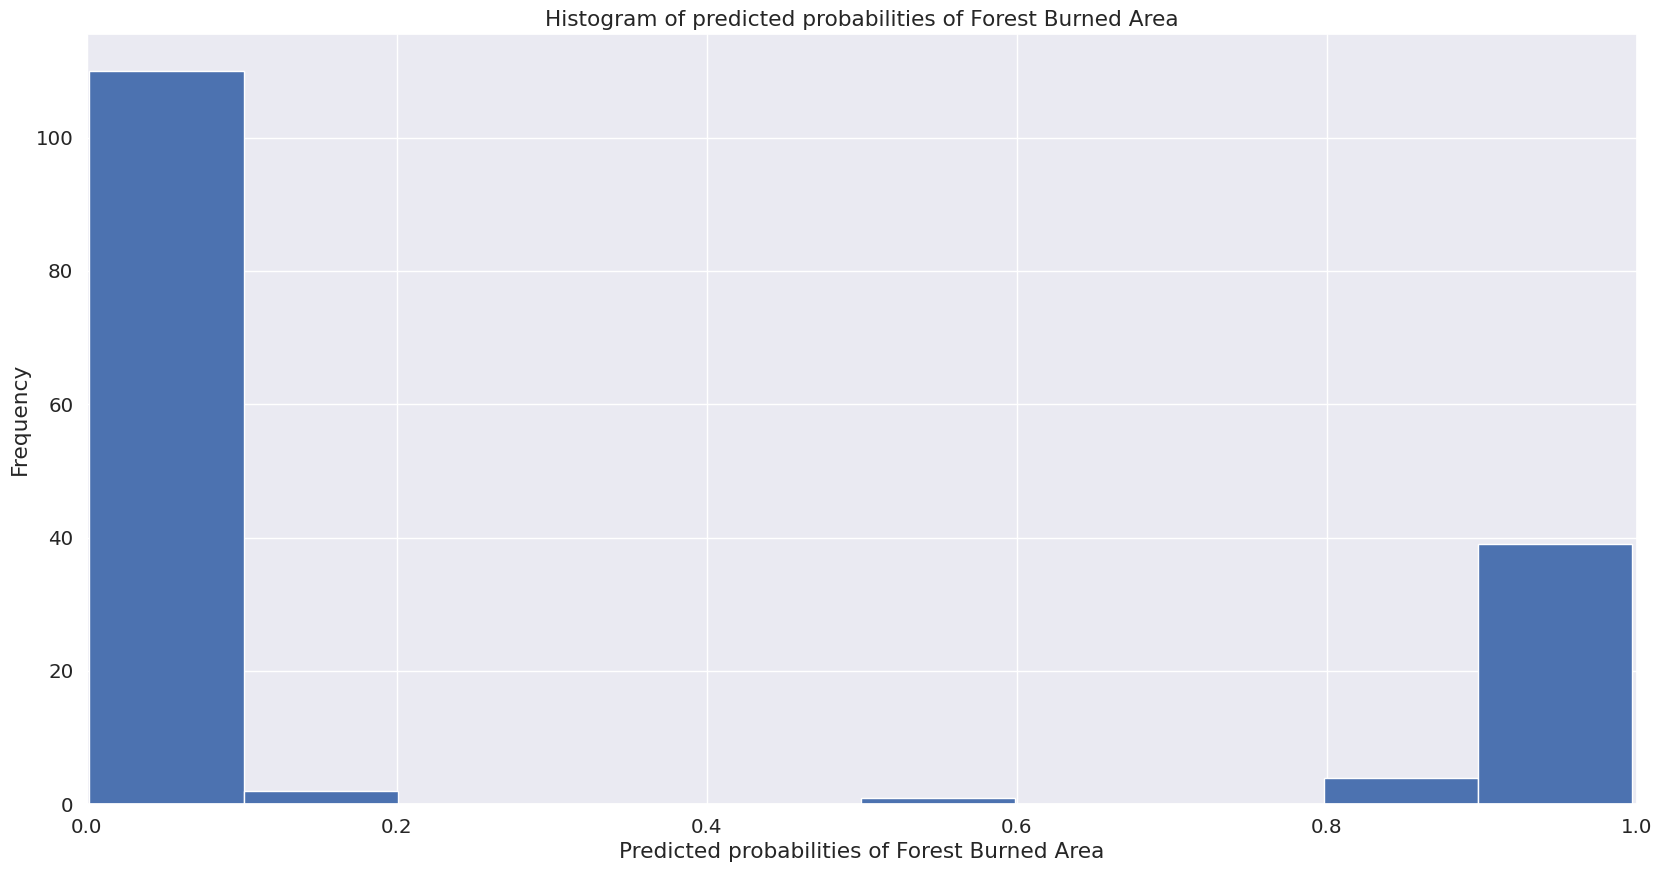

In [115]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(test_prediction['Test_Probability'], bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Forest Burned Area')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Forest Burned Area')
plt.ylabel('Frequency')